In [209]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score , precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [227]:
data=pd.read_csv('/Users/pratik-test/Downloads/cardio_train.csv', delimiter=';')

In [228]:
data

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0          0     0       1       0  
1          0     0       1       1  
2          0     0       0       1  
3          0     0       1       1  
4          0     0       0       0  
...      ...   ...     ...     ...  
69995      1     0       1       0  
69996      0     0       1       1  
69997      0     1       0       1  
69998      0     0       0       1  
69999      0     0       1       0  

[70000 rows x 13 columns]

### Features:

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
- Alcohol intake | Subjective Feature | alco | binary |
- Physical activity | Subjective Feature | active | binary |
- Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

In [229]:
data=data.drop('id', axis=1)
data

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
0         0       1       0  
1         0       1       1  
2         0       0       1  
3         0       1       1  
4         0       0       0  
...     ...     ...     ...  
69995     0       1       0  
69996     0       1       1  
69997     1       0       1  
69998     0       0       1  
69999     0       1       0  

[70000 rows x 12 columns]

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [231]:
data.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

### Removing Outliers

In [232]:
data=data.loc[data['ap_hi']<= 200,:]
data=data.loc[data['ap_hi']>= 100,:]
data=data.loc[data['ap_lo']<= 150,:]
data=data.loc[data['ap_lo']>= 30,:]
data

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
0         0       1       0  
1         0       1       1  
2         0       0       1  
3         0       1       1  
4         0       0       0  
...     ...     ...     ...  
69995     0       1       0  
69996     0       1       1  
69997     1       0       1  
69998     0       0       1  
69999     0       1       0  

[67560 rows x 12 columns]

In [233]:
data.describe()

age        gender        height        weight         ap_hi  \
count  67560.000000  67560.000000  67560.000000  67560.000000  67560.000000   
mean   19486.293961      1.351243    164.420515     74.278144    127.185391   
std     2463.009056      0.477362      8.175635     14.287641     15.946127   
min    10798.000000      1.000000     55.000000     11.000000    100.000000   
25%    17700.000000      1.000000    159.000000     65.000000    120.000000   
50%    19713.000000      1.000000    165.000000     72.000000    120.000000   
75%    21340.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000    200.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  67560.000000  67560.000000  67560.000000  67560.000000  67560.000000   
mean      81.585317      1.366578      1.226628      0.088159      0.053552   
std        9.105356      0.680936      0.573071      0.283528      0.225134   
min       30.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max      150.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  67560.000000  67560.000000  
mean       0.803419      0.499926  
std        0.397416      0.500004  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

### Check for Data Balance

In [234]:
cardio_dict={0:'No CVD', 1:'CVD'}
data_bal=data.cardio.value_counts().rename(index=cardio_dict)
data_bal

No CVD    33785
CVD       33775
Name: cardio, dtype: int64

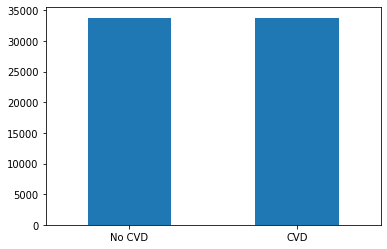

In [235]:
data_bal.plot.bar(rot=0)

## Feature Transformation and Feature Engineering 

### Age

In [236]:
# Convert Age to Years

In [237]:
data['Age in Years']=data['age']/365
data

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  Age in Years  
0         0       1       0     50.391781  
1         0       1       1     55.419178  
2         0       0       1     51.663014  
3         0       1       1     48.282192  
4         0       0       0     47.873973  
...     ...     ...     ...           ...  
69995     0       1       0     52.712329  
69996     0       1       1     61.920548  
69997     1       0       1     52.235616  
69998     0       0       1     61.454795  
69999     0       1       0     56.273973  

[67560 rows x 13 columns]

# EDA

In [238]:
# Distribution Graphs of Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a93fddb10>,
      dtype=object)

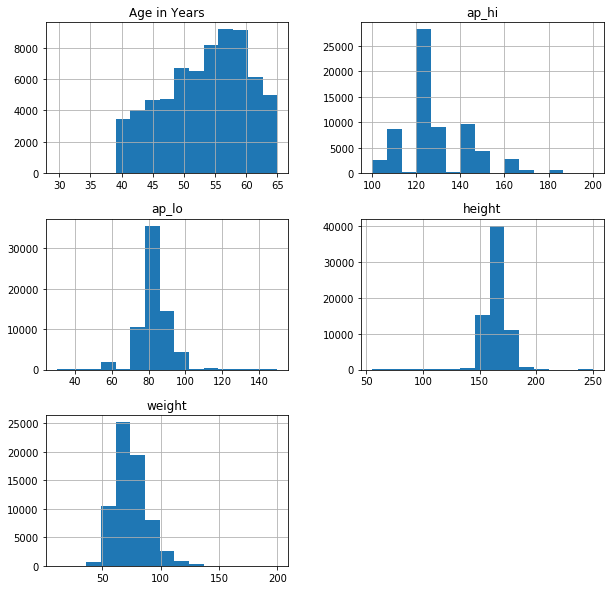

In [222]:
data.hist(column=['height','weight','ap_hi','ap_lo','Age in Years'], figsize=(10,10), bins=15)
#data.hist(column=['BMI','Sys/Dia'], figsize=(20,5), bins=50)

In [240]:
data=data.drop('age',axis=1)
data

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  cardio  Age in Years  
0           1       0     50.391781  
1           1       1     55.419178  
2           0       1     51.663014  
3           1       1     48.282192  
4           0       0     47.873973  
...       ...     ...           ...  
69995       1       0     52.712329  
69996       1       1     61.920548  
69997       0       1     52.235616  
69998       0       1     61.454795  
69999       1       0     56.273973  

[67560 rows x 12 columns]

In [241]:
X=data.drop('cardio',axis=1)
y=data['cardio']

In [242]:
X

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  Age in Years  
0           1     50.391781  
1           1     55.419178  
2           0     51.663014  
3           1     48.282192  
4           0     47.873973  
...       ...           ...  
69995       1     52.712329  
69996       1     61.920548  
69997       0     52.235616  
69998       0     61.454795  
69999       1     56.273973  

[67560 rows x 11 columns]

In [243]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 67560, dtype: int64

In [244]:
## Standerdization of Features

In [245]:
X_std=X.copy(deep=True)

In [246]:
X_std['Age in Years']=(X_std['Age in Years']-X_std['Age in Years'].mean())/X_std['Age in Years'].std()
X_std['height']=(X_std['height']-X_std['height'].mean())/X_std['height'].std()
X_std['weight']=(X_std['weight']-X_std['weight'].mean())/X_std['weight'].std()
X_std['ap_hi']=(X_std['ap_hi']-X_std['ap_hi'].mean())/X_std['ap_hi'].std()
X_std['ap_lo']=(X_std['ap_lo']-X_std['ap_lo'].mean())/X_std['ap_lo'].std()

In [247]:
X_std

gender    height    weight     ap_hi     ap_lo  cholesterol  gluc  \
0           2  0.437823 -0.859354 -1.077716 -0.174108            1     1   
1           1 -1.029952  0.750429  0.803619  0.924147            3     1   
2           1  0.070880 -0.719373  0.176507 -1.272363            3     1   
3           2  0.560138  0.540457  1.430730  2.022401            1     1   
4           1 -1.029952 -1.279298 -1.704827 -2.370618            1     1   
...       ...       ...       ...       ...       ...          ...   ...   
69995       2  0.437823  0.120514 -0.450604 -0.174108            1     1   
69996       1 -0.785323  3.620042  0.803619  0.924147            2     2   
69997       2  2.272543  2.150240  3.312065  0.924147            3     1   
69998       1 -0.173750 -0.159449  0.490063 -0.174108            1     2   
69999       1  0.682453 -0.159449 -0.450604 -0.174108            2     1   

       smoke  alco  active  Age in Years  
0          0     0       1     -0.443885  
1          0     0       1      0.301138  
2          0     0       0     -0.255498  
3          0     0       1     -0.756511  
4          0     0       0     -0.817006  
...      ...   ...     ...           ...  
69995      1     0       1     -0.099997  
69996      0     0       1      1.264594  
69997      0     1       0     -0.170642  
69998      0     0       0      1.195573  
69999      0     0       1      0.427812  

[67560 rows x 11 columns]

# Pair plot

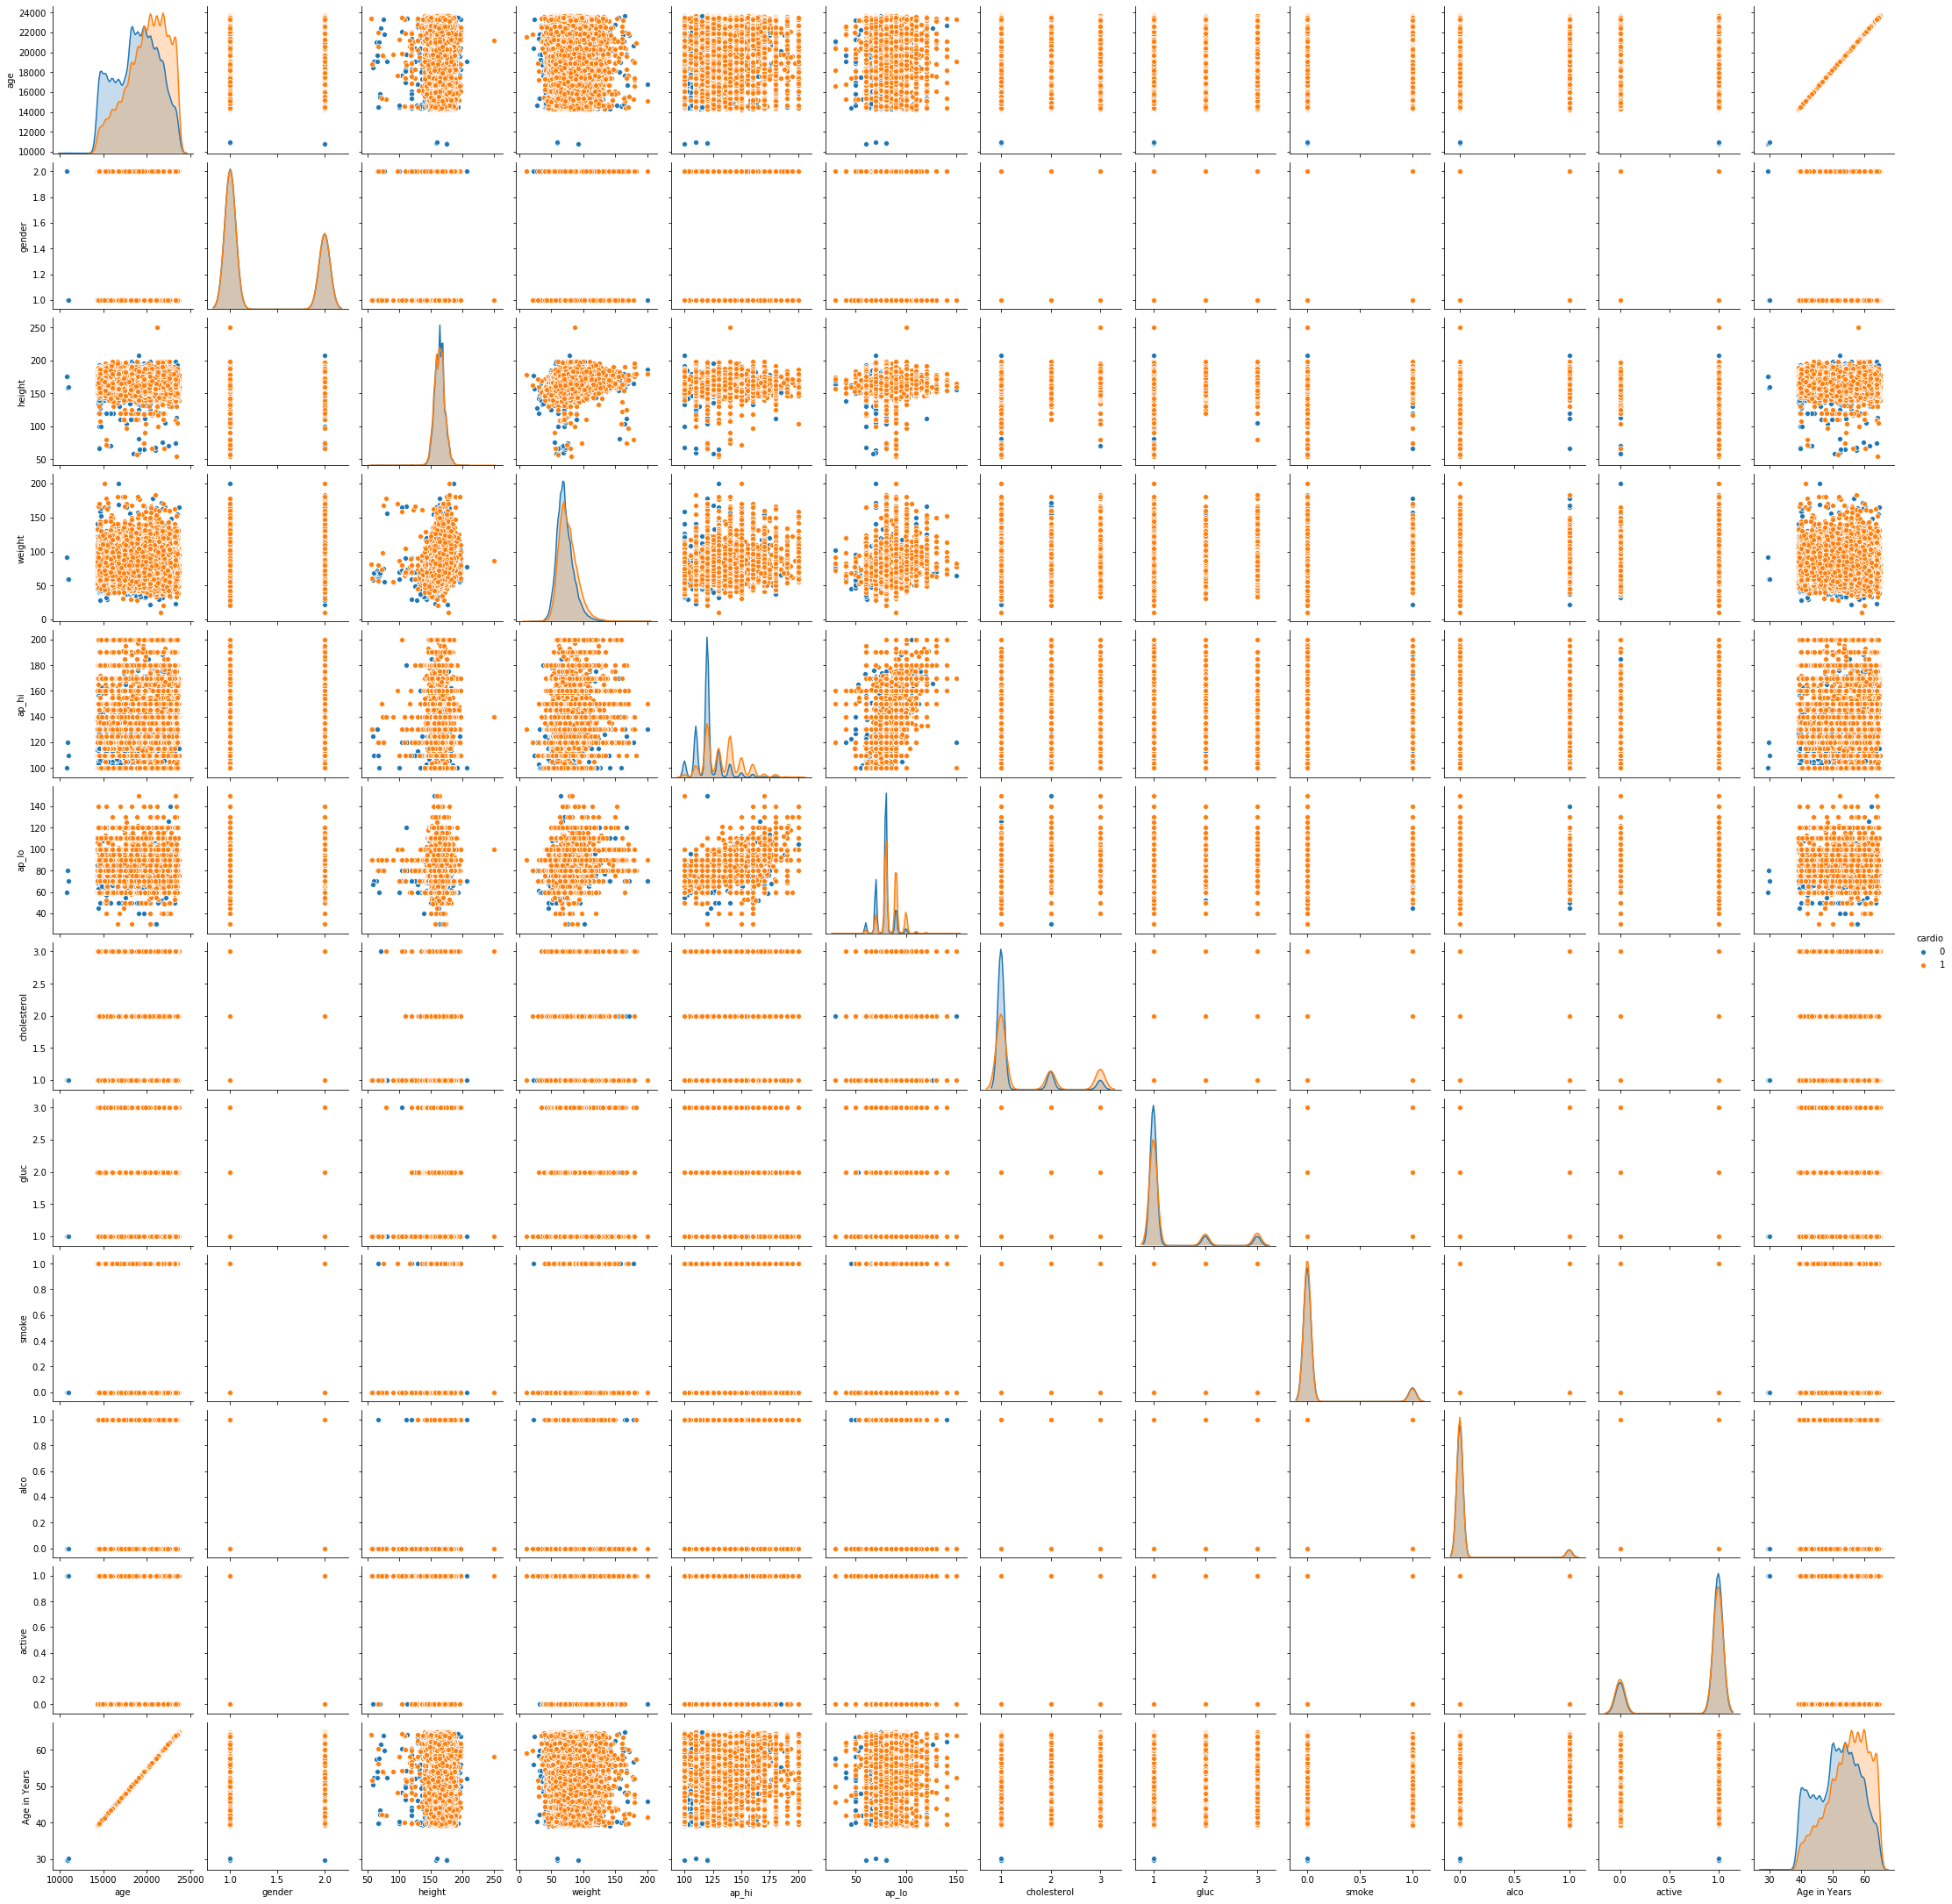

In [23]:
sns.distributions._has_statsmodels = False
sns.pairplot(data, hue='cardio')

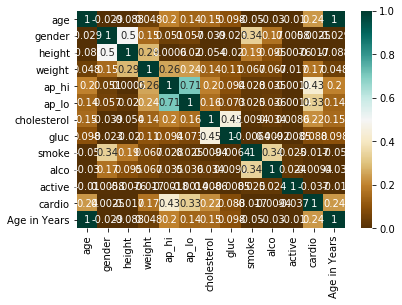

In [24]:
sns.heatmap(data.corr(), cmap="BrBG", annot=True, vmin=0, vmax=1)

# Splitting Data

In [248]:
X

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  Age in Years  
0           1     50.391781  
1           1     55.419178  
2           0     51.663014  
3           1     48.282192  
4           0     47.873973  
...       ...           ...  
69995       1     52.712329  
69996       1     61.920548  
69997       0     52.235616  
69998       0     61.454795  
69999       1     56.273973  

[67560 rows x 11 columns]

In [249]:
X_std

gender    height    weight     ap_hi     ap_lo  cholesterol  gluc  \
0           2  0.437823 -0.859354 -1.077716 -0.174108            1     1   
1           1 -1.029952  0.750429  0.803619  0.924147            3     1   
2           1  0.070880 -0.719373  0.176507 -1.272363            3     1   
3           2  0.560138  0.540457  1.430730  2.022401            1     1   
4           1 -1.029952 -1.279298 -1.704827 -2.370618            1     1   
...       ...       ...       ...       ...       ...          ...   ...   
69995       2  0.437823  0.120514 -0.450604 -0.174108            1     1   
69996       1 -0.785323  3.620042  0.803619  0.924147            2     2   
69997       2  2.272543  2.150240  3.312065  0.924147            3     1   
69998       1 -0.173750 -0.159449  0.490063 -0.174108            1     2   
69999       1  0.682453 -0.159449 -0.450604 -0.174108            2     1   

       smoke  alco  active  Age in Years  
0          0     0       1     -0.443885  
1          0     0       1      0.301138  
2          0     0       0     -0.255498  
3          0     0       1     -0.756511  
4          0     0       0     -0.817006  
...      ...   ...     ...           ...  
69995      1     0       1     -0.099997  
69996      0     0       1      1.264594  
69997      0     1       0     -0.170642  
69998      0     0       0      1.195573  
69999      0     0       1      0.427812  

[67560 rows x 11 columns]

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
61241       1     163    58.0    130     80            1     1      0     0   
12928       1     152    61.0    110     70            1     1      0     0   
37610       2     166    84.0    120     80            2     1      0     1   
41092       1     153    43.0    110     70            1     1      0     0   
20741       1     156    56.0    120     80            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
38521       1     157    54.0    120     80            1     1      0     0   
6491        2     175    83.0    120     80            1     1      0     0   
56843       1     156    60.0    120     80            1     1      0     0   
883         2     170    70.0    110     70            1     1      0     0   
16357       1     157    70.0    120     80            1     1      0     0   

       active  Age in Years  
61241       1     59.884932  
12928       1     40.021918  
37610       1     50.189041  
41092       1     39.986301  
20741       1     54.106849  
...       ...           ...  
38521       0     40.073973  
6491        1     57.416438  
56843       1     49.389041  
883         1     43.794521  
16357       1     61.446575  

[54048 rows x 11 columns]

In [251]:
X_train_std, X_test_std, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=42)
X_train_std

gender    height    weight     ap_hi     ap_lo  cholesterol  gluc  \
61241       1 -0.173750 -1.139316  0.176507 -0.174108            1     1   
12928       1 -1.519211 -0.929345 -1.077716 -1.272363            1     1   
37610       2  0.193194  0.680438 -0.450604 -0.174108            2     1   
41092       1 -1.396896 -2.189175 -1.077716 -1.272363            1     1   
20741       1 -1.029952 -1.279298 -0.450604 -0.174108            1     1   
...       ...       ...       ...       ...       ...          ...   ...   
38521       1 -0.907638 -1.419279 -0.450604 -0.174108            1     1   
6491        2  1.294026  0.610448 -0.450604 -0.174108            1     1   
56843       1 -1.029952 -0.999335 -0.450604 -0.174108            1     1   
883         2  0.682453 -0.299430 -1.077716 -1.272363            1     1   
16357       1 -0.907638 -0.299430 -0.450604 -0.174108            1     1   

       smoke  alco  active  Age in Years  
61241      0     0       1      0.962930  
12928      0     0       1     -1.980624  
37610      0     1       1     -0.473930  
41092      0     0       1     -1.985902  
20741      0     0       1      0.106661  
...      ...   ...     ...           ...  
38521      0     0       0     -1.972909  
6491       0     0       1      0.597118  
56843      0     0       1     -0.592484  
883        0     0       1     -1.421551  
16357      0     0       1      1.194355  

[54048 rows x 11 columns]

#  Baseline Modelling 

In [252]:
def coef_table(model,X_train, y_train):
    feature_coef_list=[]
    feature_list=X_train.columns
    coef_list=model.coef_
    for i in range(len(feature_list)):
        feature_coef_pair=[feature_list[i],coef_list[0][i]]
        feature_coef_list.append(feature_coef_pair)
    df=pd.DataFrame(feature_coef_list, columns=['Feature','Co-efficient'])
    return df.sort_values(by='Co-efficient', ascending=False)
        

In [253]:

def log_reg_results(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    print('Logistic Regression: ', model.score(X_test,y_test))
    predictions_model=model.predict(X_test)
    print('Precision Score:     ', precision_score(y_test, predictions_model))
    print('Recall Score:        ', recall_score(y_test, predictions_model))
    print('F1 Score:            ', f1_score(y_test, predictions_model))
    print('Cross Validation Scores: ',cross_val_score(model, X_train, y_train, cv=5))
    cm_model=confusion_matrix(y_test, predictions_model)
    plt.figure(dpi=100)
    sns.heatmap(cm_model, cmap=plt.cm.Blues, annot=True, square=True,
               xticklabels=['Positive','Negetive'],
               yticklabels=['Positive','Negetive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return coef_table(model,X_train, y_train)

In [301]:

def rf_results(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    print('Random Forest:       ', model.score(X_test,y_test))
    predictions_model=model.predict(X_test)
    print('Precision Score:     ', precision_score(y_test, predictions_model))
    print('Recall Score:        ', recall_score(y_test, predictions_model))
    print('F1 Score:            ', f1_score(y_test, predictions_model))
    print('Cross Validation Scores: ',cross_val_score(model, X_train, y_train, cv=5))
    cm_model=confusion_matrix(y_test, predictions_model)
    plt.figure(dpi=100)
    sns.heatmap(cm_model, cmap=plt.cm.Blues, annot=True, square=True,
               xticklabels=['Positive','Negetive'],
               yticklabels=['Positive','Negetive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression:  0.7127738306690349
Precision Score:      0.7388607801534193
Recall Score:         0.6649529964747356
F1 Score:             0.6999613451874759


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Cross Validation Scores:  [0.71008326 0.71720629 0.71211841 0.71320196 0.70940883]


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature  Co-efficient
5    cholesterol      0.449485
0         gender      0.260762
3          ap_hi      0.052983
10  Age in Years      0.030161
2         weight      0.015898
4          ap_lo     -0.001627
1         height     -0.056444
6           gluc     -0.138515
7          smoke     -0.203580
8           alco     -0.245378
9         active     -0.387316

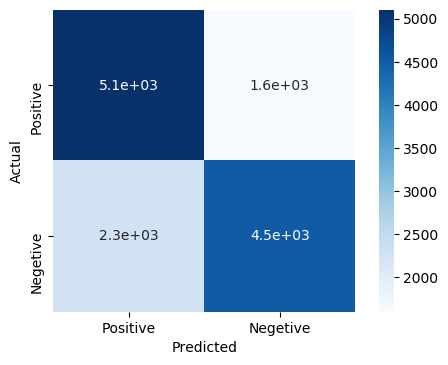

In [254]:
lm_bl=LogisticRegression()
log_reg_results(lm_bl,X_train,y_train,X_test,y_test)

Logistic Regression:  0.712181764357608
Precision Score:      0.7256144690060288
Recall Score:         0.6894829612220916
F1 Score:             0.707087444452813
Cross Validation Scores:  [0.70841813 0.71544866 0.71100833 0.70931631 0.70913128]


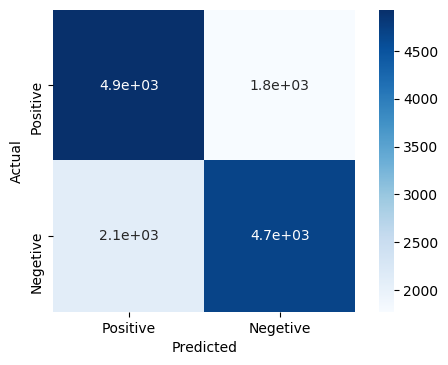

In [256]:
rf_bl=RandomForestClassifier()
rf_results(rf_bl,X_train,y_train,X_test,y_test)

In [259]:
decisiontree_bl = DecisionTreeClassifier()
decisiontree_bl.fit(X_train,y_train)
print('Decision Tree: ', decisiontree_bl.score(X_test,y_test))

Decision Tree:  0.6345470692717584


In [267]:
svc_bl = SVC(probability=True)
svc_bl.fit(X_train,y_train)
svc_bl.score(X_test,y_test)

0.7186944937833037

In [276]:
knn_bl = KNeighborsClassifier(n_neighbors=5)
knn_bl.fit(X_train, y_train)
knn_bl.score(X_test,y_test)


0.6845026642984015

Logistic Regression:  0.7244671403197158
Precision Score:      0.7591130522425668
Recall Score:         0.6637779083431258
F1 Score:             0.7082517044118799
Cross Validation Scores:  [0.72460685 0.73145236 0.72673451 0.72254603 0.72411879]


Feature  Co-efficient
3          ap_hi      0.922370
5    cholesterol      0.493795
10  Age in Years      0.347699
2         weight      0.155334
4          ap_lo      0.108685
0         gender     -0.020711
1         height     -0.024291
6           gluc     -0.123400
7          smoke     -0.144039
8           alco     -0.211939
9         active     -0.217840

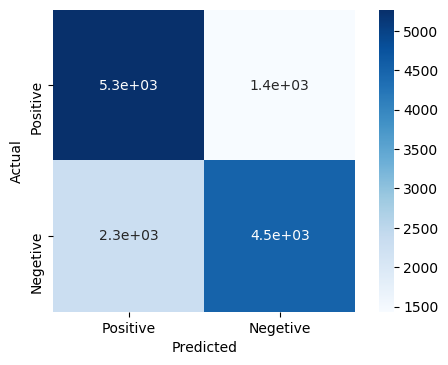

In [262]:
lm_bl_std=LogisticRegression()
log_reg_results(lm_bl_std,X_train_std,y_train,X_test_std,y_test)

In [280]:

rf_bl_std=RandomForestClassifier()
rf_bl_std.fit(X_train_std,y_train)
print('Random Forest Modelling: ', rf_bl_std.score(X_test_std,y_test))

Random Forest Modelling:  0.7103315571343991


In [281]:
knn_bl_std = KNeighborsClassifier(n_neighbors=5)
knn_bl_std.fit(X_train_std,y_train)
knn_bl_std.score(X_test_std,y_test)

0.6961959739490823

# AUC ROC Curve

In [284]:
from sklearn.metrics import roc_auc_score, roc_curve

lm_fpr_bl, lm_tpr_bl, thresholds = roc_curve(y_test, lm_bl.predict_proba(X_test)[:,1])
rf_fpr_bl, rf_tpr_bl, thresholds = roc_curve(y_test, rf_bl.predict_proba(X_test)[:,1])
#decisiontree_fpr_bl, decisiontree_tpr_bl, thresholds = roc_curve(y_test, decisiontree_bl.predict_proba(X_test)[:,1])
#svc_fpr_bl, svc_tpr_bl, thresholds = roc_curve(y_test, svc_bl.predict_proba(X_test)[:,1])
knn_fpr_bl, knn_tpr_bl, thresholds = roc_curve(y_test, knn_bl.predict_proba(X_test)[:,1])
lm_fpr_bl_std, lm_tpr_bl_std, thresholds = roc_curve(y_test, lm_bl_std.predict_proba(X_test_std)[:,1])
rf_fpr_bl_std, rf_tpr_bl_std, thresholds = roc_curve(y_test, rf_bl_std.predict_proba(X_test_std)[:,1])
knn_fpr_bl_std, knn_tpr_bl_std, thresholds = roc_curve(y_test, knn_bl_std.predict_proba(X_test_std)[:,1])

ROC AUC score (lm_bl)=  0.7708049340555404
ROC AUC score (rf_bl)=  0.7705452871674205
ROC AUC score (knn_bl)=  0.7299954786100307
ROC AUC score (lm_bl_std)=  0.7887029644858359
ROC AUC score (rf_bl_std)=  0.7701772504935932
ROC AUC score (knn_bl_std)=  0.7435813943970171


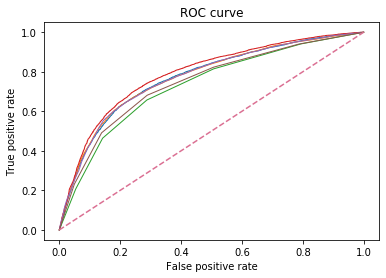

In [286]:
plt.plot(lm_fpr_bl, lm_tpr_bl,lw=1)
plt.plot(rf_fpr_bl, rf_tpr_bl,lw=1)
#plt.plot(decisiontree_fpr_bl, decisiontree_tpr_bl,lw=1)
#plt.plot(svc_fpr_bl, svc_tpr_bl,lw=1)
plt.plot(knn_fpr_bl, knn_tpr_bl,lw=1)
plt.plot(lm_fpr_bl_std, lm_tpr_bl_std,lw=1)
plt.plot(rf_fpr_bl_std, rf_tpr_bl_std,lw=1)
plt.plot(knn_fpr_bl_std, knn_tpr_bl_std,lw=1)

plt.plot([0,1],[0,1],c='palevioletred',ls='--')


plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score (lm_bl)= ", roc_auc_score(y_test, lm_bl.predict_proba(X_test)[:,1]))
print("ROC AUC score (rf_bl)= ", roc_auc_score(y_test, rf_bl.predict_proba(X_test)[:,1]))
#print("ROC AUC score (decisiontree_bl)= ", roc_auc_score(y_test, decisiontree_bl.predict_proba(X_test)[:,1]))
#print("ROC AUC score (svc_bl)= ", roc_auc_score(y_test, svc_bl.predict_proba(X_test)[:,1]))
print("ROC AUC score (knn_bl)= ", roc_auc_score(y_test, knn_bl.predict_proba(X_test)[:,1]))
print("ROC AUC score (lm_bl_std)= ", roc_auc_score(y_test, lm_bl_std.predict_proba(X_test_std)[:,1]))
print("ROC AUC score (rf_bl_std)= ", roc_auc_score(y_test, rf_bl_std.predict_proba(X_test_std)[:,1]))
print("ROC AUC score (knn_bl_std)= ", roc_auc_score(y_test, knn_bl_std.predict_proba(X_test_std)[:,1]))

# Feature Engineering 

## 1.1 BMI

In [287]:
X_bmi=X.copy(deep=True)
X_bmi

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  Age in Years  
0           1     50.391781  
1           1     55.419178  
2           0     51.663014  
3           1     48.282192  
4           0     47.873973  
...       ...           ...  
69995       1     52.712329  
69996       1     61.920548  
69997       0     52.235616  
69998       0     61.454795  
69999       1     56.273973  

[67560 rows x 11 columns]

In [290]:
X_bmi['BMI']=X_bmi['weight']/(X_bmi['height']/100)**2

In [291]:
X_bmi

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  Age in Years        BMI  
0           1     50.391781  21.967120  
1           1     55.419178  34.927679  
2           0     51.663014  23.507805  
3           1     48.282192  28.710479  
4           0     47.873973  23.011177  
...       ...           ...        ...  
69995       1     52.712329  26.927438  
69996       1     61.920548  50.472681  
69997       0     52.235616  31.353579  
69998       0     61.454795  27.099251  
69999       1     56.273973  24.913495  

[67560 rows x 12 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a8f3f6050>]],
      dtype=object)

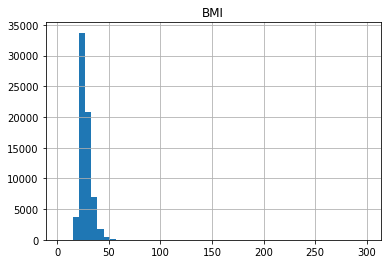

In [292]:
X_bmi.hist(column='BMI', bins=50)

In [293]:
X_std=X_bmi.copy(deep=True)

In [294]:
X_std['Age in Years']=(X_std['Age in Years']-X_std['Age in Years'].mean())/X_std['Age in Years'].std()
X_std['height']=(X_std['height']-X_std['height'].mean())/X_std['height'].std()
X_std['weight']=(X_std['weight']-X_std['weight'].mean())/X_std['weight'].std()
X_std['ap_hi']=(X_std['ap_hi']-X_std['ap_hi'].mean())/X_std['ap_hi'].std()
X_std['ap_lo']=(X_std['ap_lo']-X_std['ap_lo'].mean())/X_std['ap_lo'].std()
X_std['BMI']=(X_std['BMI']-X_std['BMI'].mean())/X_std['BMI'].std()

In [295]:
X_std

gender    height    weight     ap_hi     ap_lo  cholesterol  gluc  \
0           2  0.437823 -0.859354 -1.077716 -0.174108            1     1   
1           1 -1.029952  0.750429  0.803619  0.924147            3     1   
2           1  0.070880 -0.719373  0.176507 -1.272363            3     1   
3           2  0.560138  0.540457  1.430730  2.022401            1     1   
4           1 -1.029952 -1.279298 -1.704827 -2.370618            1     1   
...       ...       ...       ...       ...       ...          ...   ...   
69995       2  0.437823  0.120514 -0.450604 -0.174108            1     1   
69996       1 -0.785323  3.620042  0.803619  0.924147            2     2   
69997       2  2.272543  2.150240  3.312065  0.924147            3     1   
69998       1 -0.173750 -0.159449  0.490063 -0.174108            1     2   
69999       1  0.682453 -0.159449 -0.450604 -0.174108            2     1   

       smoke  alco  active  Age in Years       BMI  
0          0     0       1     -0.443885 -0.924321  
1          0     0       1      0.301138  1.216142  
2          0     0       0     -0.255498 -0.669873  
3          0     0       1     -0.756511  0.189359  
4          0     0       0     -0.817006 -0.751892  
...      ...   ...     ...           ...       ...  
69995      1     0       1     -0.099997 -0.105114  
69996      0     0       1      1.264594  3.783431  
69997      0     1       0     -0.170642  0.625872  
69998      0     0       0      1.195573 -0.076739  
69999      0     0       1      0.427812 -0.437721  

[67560 rows x 12 columns]

In [296]:
X_train_bmi, X_test_bmi, y_train, y_test = train_test_split(X_bmi, y, test_size = 0.2, random_state=42)
X_train_bmi

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
61241       1     163    58.0    130     80            1     1      0     0   
12928       1     152    61.0    110     70            1     1      0     0   
37610       2     166    84.0    120     80            2     1      0     1   
41092       1     153    43.0    110     70            1     1      0     0   
20741       1     156    56.0    120     80            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
38521       1     157    54.0    120     80            1     1      0     0   
6491        2     175    83.0    120     80            1     1      0     0   
56843       1     156    60.0    120     80            1     1      0     0   
883         2     170    70.0    110     70            1     1      0     0   
16357       1     157    70.0    120     80            1     1      0     0   

       active  Age in Years        BMI  
61241       1     59.884932  21.829952  
12928       1     40.021918  26.402355  
37610       1     50.189041  30.483379  
41092       1     39.986301  18.369003  
20741       1     54.106849  23.011177  
...       ...           ...        ...  
38521       0     40.073973  21.907582  
6491        1     57.416438  27.102041  
56843       1     49.389041  24.654832  
883         1     43.794521  24.221453  
16357       1     61.446575  28.398718  

[54048 rows x 12 columns]

In [297]:
X_train_std_bmi, X_test_std_bmi, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=42)
X_train_std_bmi

gender    height    weight     ap_hi     ap_lo  cholesterol  gluc  \
61241       1 -0.173750 -1.139316  0.176507 -0.174108            1     1   
12928       1 -1.519211 -0.929345 -1.077716 -1.272363            1     1   
37610       2  0.193194  0.680438 -0.450604 -0.174108            2     1   
41092       1 -1.396896 -2.189175 -1.077716 -1.272363            1     1   
20741       1 -1.029952 -1.279298 -0.450604 -0.174108            1     1   
...       ...       ...       ...       ...       ...          ...   ...   
38521       1 -0.907638 -1.419279 -0.450604 -0.174108            1     1   
6491        2  1.294026  0.610448 -0.450604 -0.174108            1     1   
56843       1 -1.029952 -0.999335 -0.450604 -0.174108            1     1   
883         2  0.682453 -0.299430 -1.077716 -1.272363            1     1   
16357       1 -0.907638 -0.299430 -0.450604 -0.174108            1     1   

       smoke  alco  active  Age in Years       BMI  
61241      0     0       1      0.962930 -0.946974  
12928      0     0       1     -1.980624 -0.191833  
37610      0     1       1     -0.473930  0.482157  
41092      0     0       1     -1.985902 -1.518557  
20741      0     0       1      0.106661 -0.751892  
...      ...   ...     ...           ...       ...  
38521      0     0       0     -1.972909 -0.934153  
6491       0     0       1      0.597118 -0.076278  
56843      0     0       1     -0.592484 -0.480439  
883        0     0       1     -1.421551 -0.552013  
16357      0     0       1      1.194355  0.137871  

[54048 rows x 12 columns]

/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression:  0.7244671403197158
Precision Score:      0.7583319376988779
Recall Score:         0.6650998824911868
F1 Score:             0.7086626496595978


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Cross Validation Scores:  [0.72183164 0.72895467 0.72368178 0.72115829 0.72365621]


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature  Co-efficient
5    cholesterol      0.496090
2         weight      0.070827
3          ap_hi      0.056713
10  Age in Years      0.046796
0         gender      0.037637
4          ap_lo      0.008676
1         height     -0.070875
7          smoke     -0.081191
8           alco     -0.083471
6           gluc     -0.150642
11           BMI     -0.155744
9         active     -0.225888

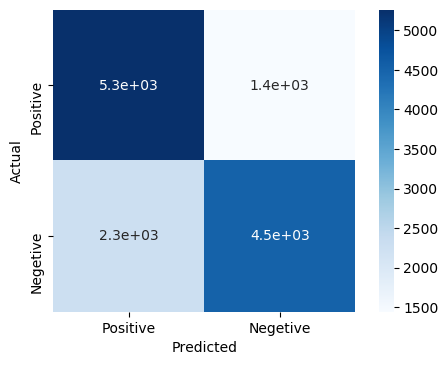

In [298]:
#Feature Engineering with BMI

lm_bmi=LogisticRegression()
log_reg_results(lm_bmi,X_train_bmi,y_train,X_test_bmi,y_test)

In [299]:
knn_bmi = KNeighborsClassifier(n_neighbors=5)
knn_bmi.fit(X_train_bmi, y_train)
knn_bmi.score(X_test_bmi,y_test)

0.6830965068087625

Random Forest:        0.7057430432208407
Precision Score:      0.7165799938819211
Recall Score:         0.6881609870740305
F1 Score:             0.7020830211299266
Cross Validation Scores:  [0.70388529 0.71174838 0.71387604 0.70691091 0.71236932]


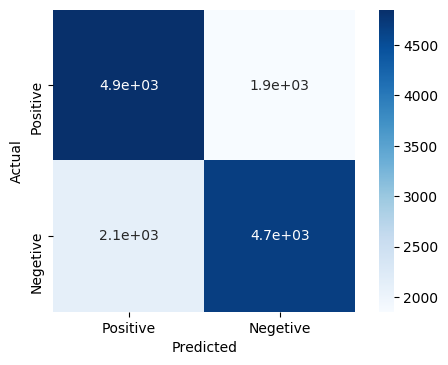

In [303]:
rf_bmi=RandomForestClassifier()
rf_results(rf_bmi,X_train_bmi,y_train,X_test_bmi,y_test)

Logistic Regression:  0.7244671403197158
Precision Score:      0.7589390632868894
Recall Score:         0.6640716803760282
F1 Score:             0.70834312573443
Cross Validation Scores:  [0.72460685 0.73117484 0.72636448 0.72254603 0.72411879]


Feature  Co-efficient
3          ap_hi      0.922225
5    cholesterol      0.493519
10  Age in Years      0.347548
2         weight      0.173139
4          ap_lo      0.108607
0         gender     -0.018674
11           BMI     -0.019183
1         height     -0.035592
6           gluc     -0.123453
7          smoke     -0.143646
8           alco     -0.212372
9         active     -0.217891

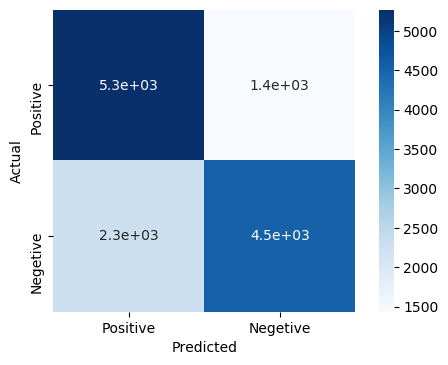

In [305]:
lm_bmi_std=LogisticRegression()
log_reg_results(lm_bmi_std,X_train_std_bmi,y_train,X_test_std_bmi,y_test)

In [330]:
rf_bmi_std=RandomForestClassifier()
rf_bmi_std.fit(X_train_std_bmi,y_train)
print('Random Forest Modelling: ', rf_bmi_std.score(X_test_std_bmi,y_test))

Random Forest Modelling:  0.7076672587329781


# Blood Pressure - Systolic/Diastolic

In [306]:
X_bp=X_bmi.copy(deep=True)
X_bp

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  Age in Years        BMI  
0           1     50.391781  21.967120  
1           1     55.419178  34.927679  
2           0     51.663014  23.507805  
3           1     48.282192  28.710479  
4           0     47.873973  23.011177  
...       ...           ...        ...  
69995       1     52.712329  26.927438  
69996       1     61.920548  50.472681  
69997       0     52.235616  31.353579  
69998       0     61.454795  27.099251  
69999       1     56.273973  24.913495  

[67560 rows x 12 columns]

In [307]:
X_bp['Sys/Dia']=X_bp['ap_hi']/X_bp['ap_lo']
X_bp

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  Age in Years        BMI   Sys/Dia  
0           1     50.391781  21.967120  1.375000  
1           1     55.419178  34.927679  1.555556  
2           0     51.663014  23.507805  1.857143  
3           1     48.282192  28.710479  1.500000  
4           0     47.873973  23.011177  1.666667  
...       ...           ...        ...       ...  
69995       1     52.712329  26.927438  1.500000  
69996       1     61.920548  50.472681  1.555556  
69997       0     52.235616  31.353579  2.000000  
69998       0     61.454795  27.099251  1.687500  
69999       1     56.273973  24.913495  1.500000  

[67560 rows x 13 columns]

In [308]:
X_std=X_bp.copy(deep=True)

In [309]:
X_std['Age in Years']=(X_std['Age in Years']-X_std['Age in Years'].mean())/X_std['Age in Years'].std()
X_std['height']=(X_std['height']-X_std['height'].mean())/X_std['height'].std()
X_std['weight']=(X_std['weight']-X_std['weight'].mean())/X_std['weight'].std()
X_std['ap_hi']=(X_std['ap_hi']-X_std['ap_hi'].mean())/X_std['ap_hi'].std()
X_std['ap_lo']=(X_std['ap_lo']-X_std['ap_lo'].mean())/X_std['ap_lo'].std()
X_std['BMI']=(X_std['BMI']-X_std['BMI'].mean())/X_std['BMI'].std()

In [310]:
X_std

gender    height    weight     ap_hi     ap_lo  cholesterol  gluc  \
0           2  0.437823 -0.859354 -1.077716 -0.174108            1     1   
1           1 -1.029952  0.750429  0.803619  0.924147            3     1   
2           1  0.070880 -0.719373  0.176507 -1.272363            3     1   
3           2  0.560138  0.540457  1.430730  2.022401            1     1   
4           1 -1.029952 -1.279298 -1.704827 -2.370618            1     1   
...       ...       ...       ...       ...       ...          ...   ...   
69995       2  0.437823  0.120514 -0.450604 -0.174108            1     1   
69996       1 -0.785323  3.620042  0.803619  0.924147            2     2   
69997       2  2.272543  2.150240  3.312065  0.924147            3     1   
69998       1 -0.173750 -0.159449  0.490063 -0.174108            1     2   
69999       1  0.682453 -0.159449 -0.450604 -0.174108            2     1   

       smoke  alco  active  Age in Years       BMI   Sys/Dia  
0          0     0       1     -0.443885 -0.924321  1.375000  
1          0     0       1      0.301138  1.216142  1.555556  
2          0     0       0     -0.255498 -0.669873  1.857143  
3          0     0       1     -0.756511  0.189359  1.500000  
4          0     0       0     -0.817006 -0.751892  1.666667  
...      ...   ...     ...           ...       ...       ...  
69995      1     0       1     -0.099997 -0.105114  1.500000  
69996      0     0       1      1.264594  3.783431  1.555556  
69997      0     1       0     -0.170642  0.625872  2.000000  
69998      0     0       0      1.195573 -0.076739  1.687500  
69999      0     0       1      0.427812 -0.437721  1.500000  

[67560 rows x 13 columns]

In [313]:
X_train_bp, X_test_bp, y_train, y_test = train_test_split(X_bp, y, test_size = 0.2, random_state=42)
X_train_bp

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
61241       1     163    58.0    130     80            1     1      0     0   
12928       1     152    61.0    110     70            1     1      0     0   
37610       2     166    84.0    120     80            2     1      0     1   
41092       1     153    43.0    110     70            1     1      0     0   
20741       1     156    56.0    120     80            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
38521       1     157    54.0    120     80            1     1      0     0   
6491        2     175    83.0    120     80            1     1      0     0   
56843       1     156    60.0    120     80            1     1      0     0   
883         2     170    70.0    110     70            1     1      0     0   
16357       1     157    70.0    120     80            1     1      0     0   

       active  Age in Years        BMI   Sys/Dia  
61241       1     59.884932  21.829952  1.625000  
12928       1     40.021918  26.402355  1.571429  
37610       1     50.189041  30.483379  1.500000  
41092       1     39.986301  18.369003  1.571429  
20741       1     54.106849  23.011177  1.500000  
...       ...           ...        ...       ...  
38521       0     40.073973  21.907582  1.500000  
6491        1     57.416438  27.102041  1.500000  
56843       1     49.389041  24.654832  1.500000  
883         1     43.794521  24.221453  1.571429  
16357       1     61.446575  28.398718  1.500000  

[54048 rows x 13 columns]

In [314]:
X_train_std_bp, X_test_std_bp, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=42)
X_train_std_bp

gender    height    weight     ap_hi     ap_lo  cholesterol  gluc  \
61241       1 -0.173750 -1.139316  0.176507 -0.174108            1     1   
12928       1 -1.519211 -0.929345 -1.077716 -1.272363            1     1   
37610       2  0.193194  0.680438 -0.450604 -0.174108            2     1   
41092       1 -1.396896 -2.189175 -1.077716 -1.272363            1     1   
20741       1 -1.029952 -1.279298 -0.450604 -0.174108            1     1   
...       ...       ...       ...       ...       ...          ...   ...   
38521       1 -0.907638 -1.419279 -0.450604 -0.174108            1     1   
6491        2  1.294026  0.610448 -0.450604 -0.174108            1     1   
56843       1 -1.029952 -0.999335 -0.450604 -0.174108            1     1   
883         2  0.682453 -0.299430 -1.077716 -1.272363            1     1   
16357       1 -0.907638 -0.299430 -0.450604 -0.174108            1     1   

       smoke  alco  active  Age in Years       BMI   Sys/Dia  
61241      0     0       1      0.962930 -0.946974  1.625000  
12928      0     0       1     -1.980624 -0.191833  1.571429  
37610      0     1       1     -0.473930  0.482157  1.500000  
41092      0     0       1     -1.985902 -1.518557  1.571429  
20741      0     0       1      0.106661 -0.751892  1.500000  
...      ...   ...     ...           ...       ...       ...  
38521      0     0       0     -1.972909 -0.934153  1.500000  
6491       0     0       1      0.597118 -0.076278  1.500000  
56843      0     0       1     -0.592484 -0.480439  1.500000  
883        0     0       1     -1.421551 -0.552013  1.571429  
16357      0     0       1      1.194355  0.137871  1.500000  

[54048 rows x 13 columns]

/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression:  0.7252072232089994
Precision Score:      0.758563074352548
Recall Score:         0.6668625146886017
F1 Score:             0.7097631517235988


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Cross Validation Scores:  [0.72183164 0.72895467 0.72627197 0.72162087 0.72347118]


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature  Co-efficient
5    cholesterol      0.461143
2         weight      0.069625
0         gender      0.069238
3          ap_hi      0.058213
10  Age in Years      0.046319
4          ap_lo      0.006193
1         height     -0.069888
12       Sys/Dia     -0.080723
6           gluc     -0.115082
7          smoke     -0.136090
11           BMI     -0.151636
8           alco     -0.154837
9         active     -0.249432

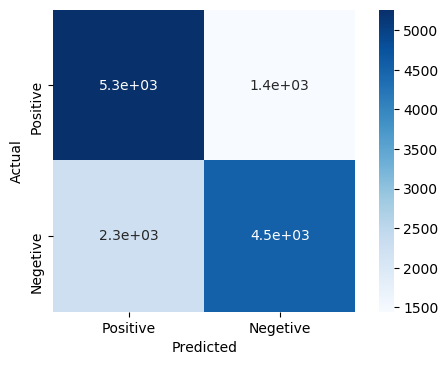

In [315]:
#Feature Engineering with Systolic/Diaslotic Blood Pressure

lm_bp=LogisticRegression()
log_reg_results(lm_bp,X_train_bp,y_train,X_test_bp,y_test)

Random Forest:        0.7078892835997632
Precision Score:      0.7184970215365817
Recall Score:         0.690951821386604
F1 Score:             0.7044552602021715
Cross Validation Scores:  [0.70518039 0.70777058 0.71100833 0.70765103 0.70857619]


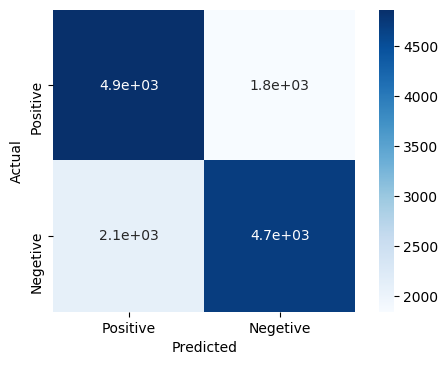

In [316]:
rf_bp=RandomForestClassifier()
rf_results(rf_bp,X_train_bp,y_train,X_test_bp,y_test)


In [317]:
knn_bp = KNeighborsClassifier(n_neighbors=5)
knn_bp.fit(X_train_bp, y_train)
knn_bp.score(X_test_bp,y_test)

0.6830965068087625

Logistic Regression:  0.724097098875074
Precision Score:      0.7586496472959355
Recall Score:         0.6634841363102233
F1 Score:             0.7078827769942015
Cross Validation Scores:  [0.72414431 0.73108233 0.72599445 0.72291609 0.7230086 ]


Feature  Co-efficient
12       Sys/Dia      1.336210
3          ap_hi      0.648656
5    cholesterol      0.492931
4          ap_lo      0.358214
10  Age in Years      0.347486
2         weight      0.172245
11           BMI     -0.019253
0         gender     -0.019346
1         height     -0.035123
6           gluc     -0.123012
7          smoke     -0.144125
8           alco     -0.213663
9         active     -0.217377

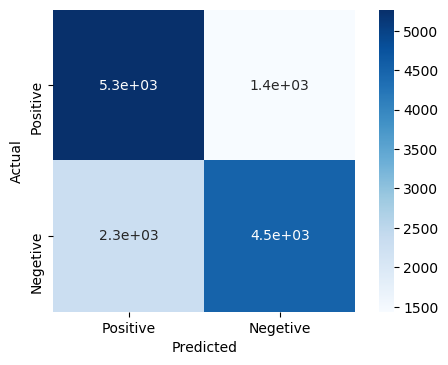

In [318]:
lm_bp_std=LogisticRegression()
log_reg_results(lm_bp_std,X_train_std_bp,y_train,X_test_std_bp,y_test)

In [319]:
rf_bp_std=RandomForestClassifier()
rf_bp_std.fit(X_train_std_bp,y_train)
print('Random Forest Modelling: ', rf_bp_std.score(X_test_std_bp,y_test))

Random Forest Modelling:  0.70848134991119


# Pair Plot with new Features

In [64]:
data

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  Age in Years  
0         0       1       0     50.391781  
1         0       1       1     55.419178  
2         0       0       1     51.663014  
3         0       1       1     48.282192  
4         0       0       0     47.873973  
...     ...     ...     ...           ...  
69995     0       1       0     52.712329  
69996     0       1       1     61.920548  
69997     1       0       1     52.235616  
69998     0       0       1     61.454795  
69999     0       1       0     56.273973  

[67560 rows x 13 columns]

In [65]:
data['BMI']=data['weight']/(data['height']/100)**2

In [66]:
data['Sys/Dia']=data['ap_hi']/data['ap_lo']

In [67]:
data.drop('age',axis=1)

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  cardio  Age in Years        BMI   Sys/Dia  
0           1       0     50.391781  21.967120  1.375000  
1           1       1     55.419178  34.927679  1.555556  
2           0       1     51.663014  23.507805  1.857143  
3           1       1     48.282192  28.710479  1.500000  
4           0       0     47.873973  23.011177  1.666667  
...       ...     ...           ...        ...       ...  
69995       1       0     52.712329  26.927438  1.500000  
69996       1       1     61.920548  50.472681  1.555556  
69997       0       1     52.235616  31.353579  2.000000  
69998       0       1     61.454795  27.099251  1.687500  
69999       1       0     56.273973  24.913495  1.500000  

[67560 rows x 14 columns]

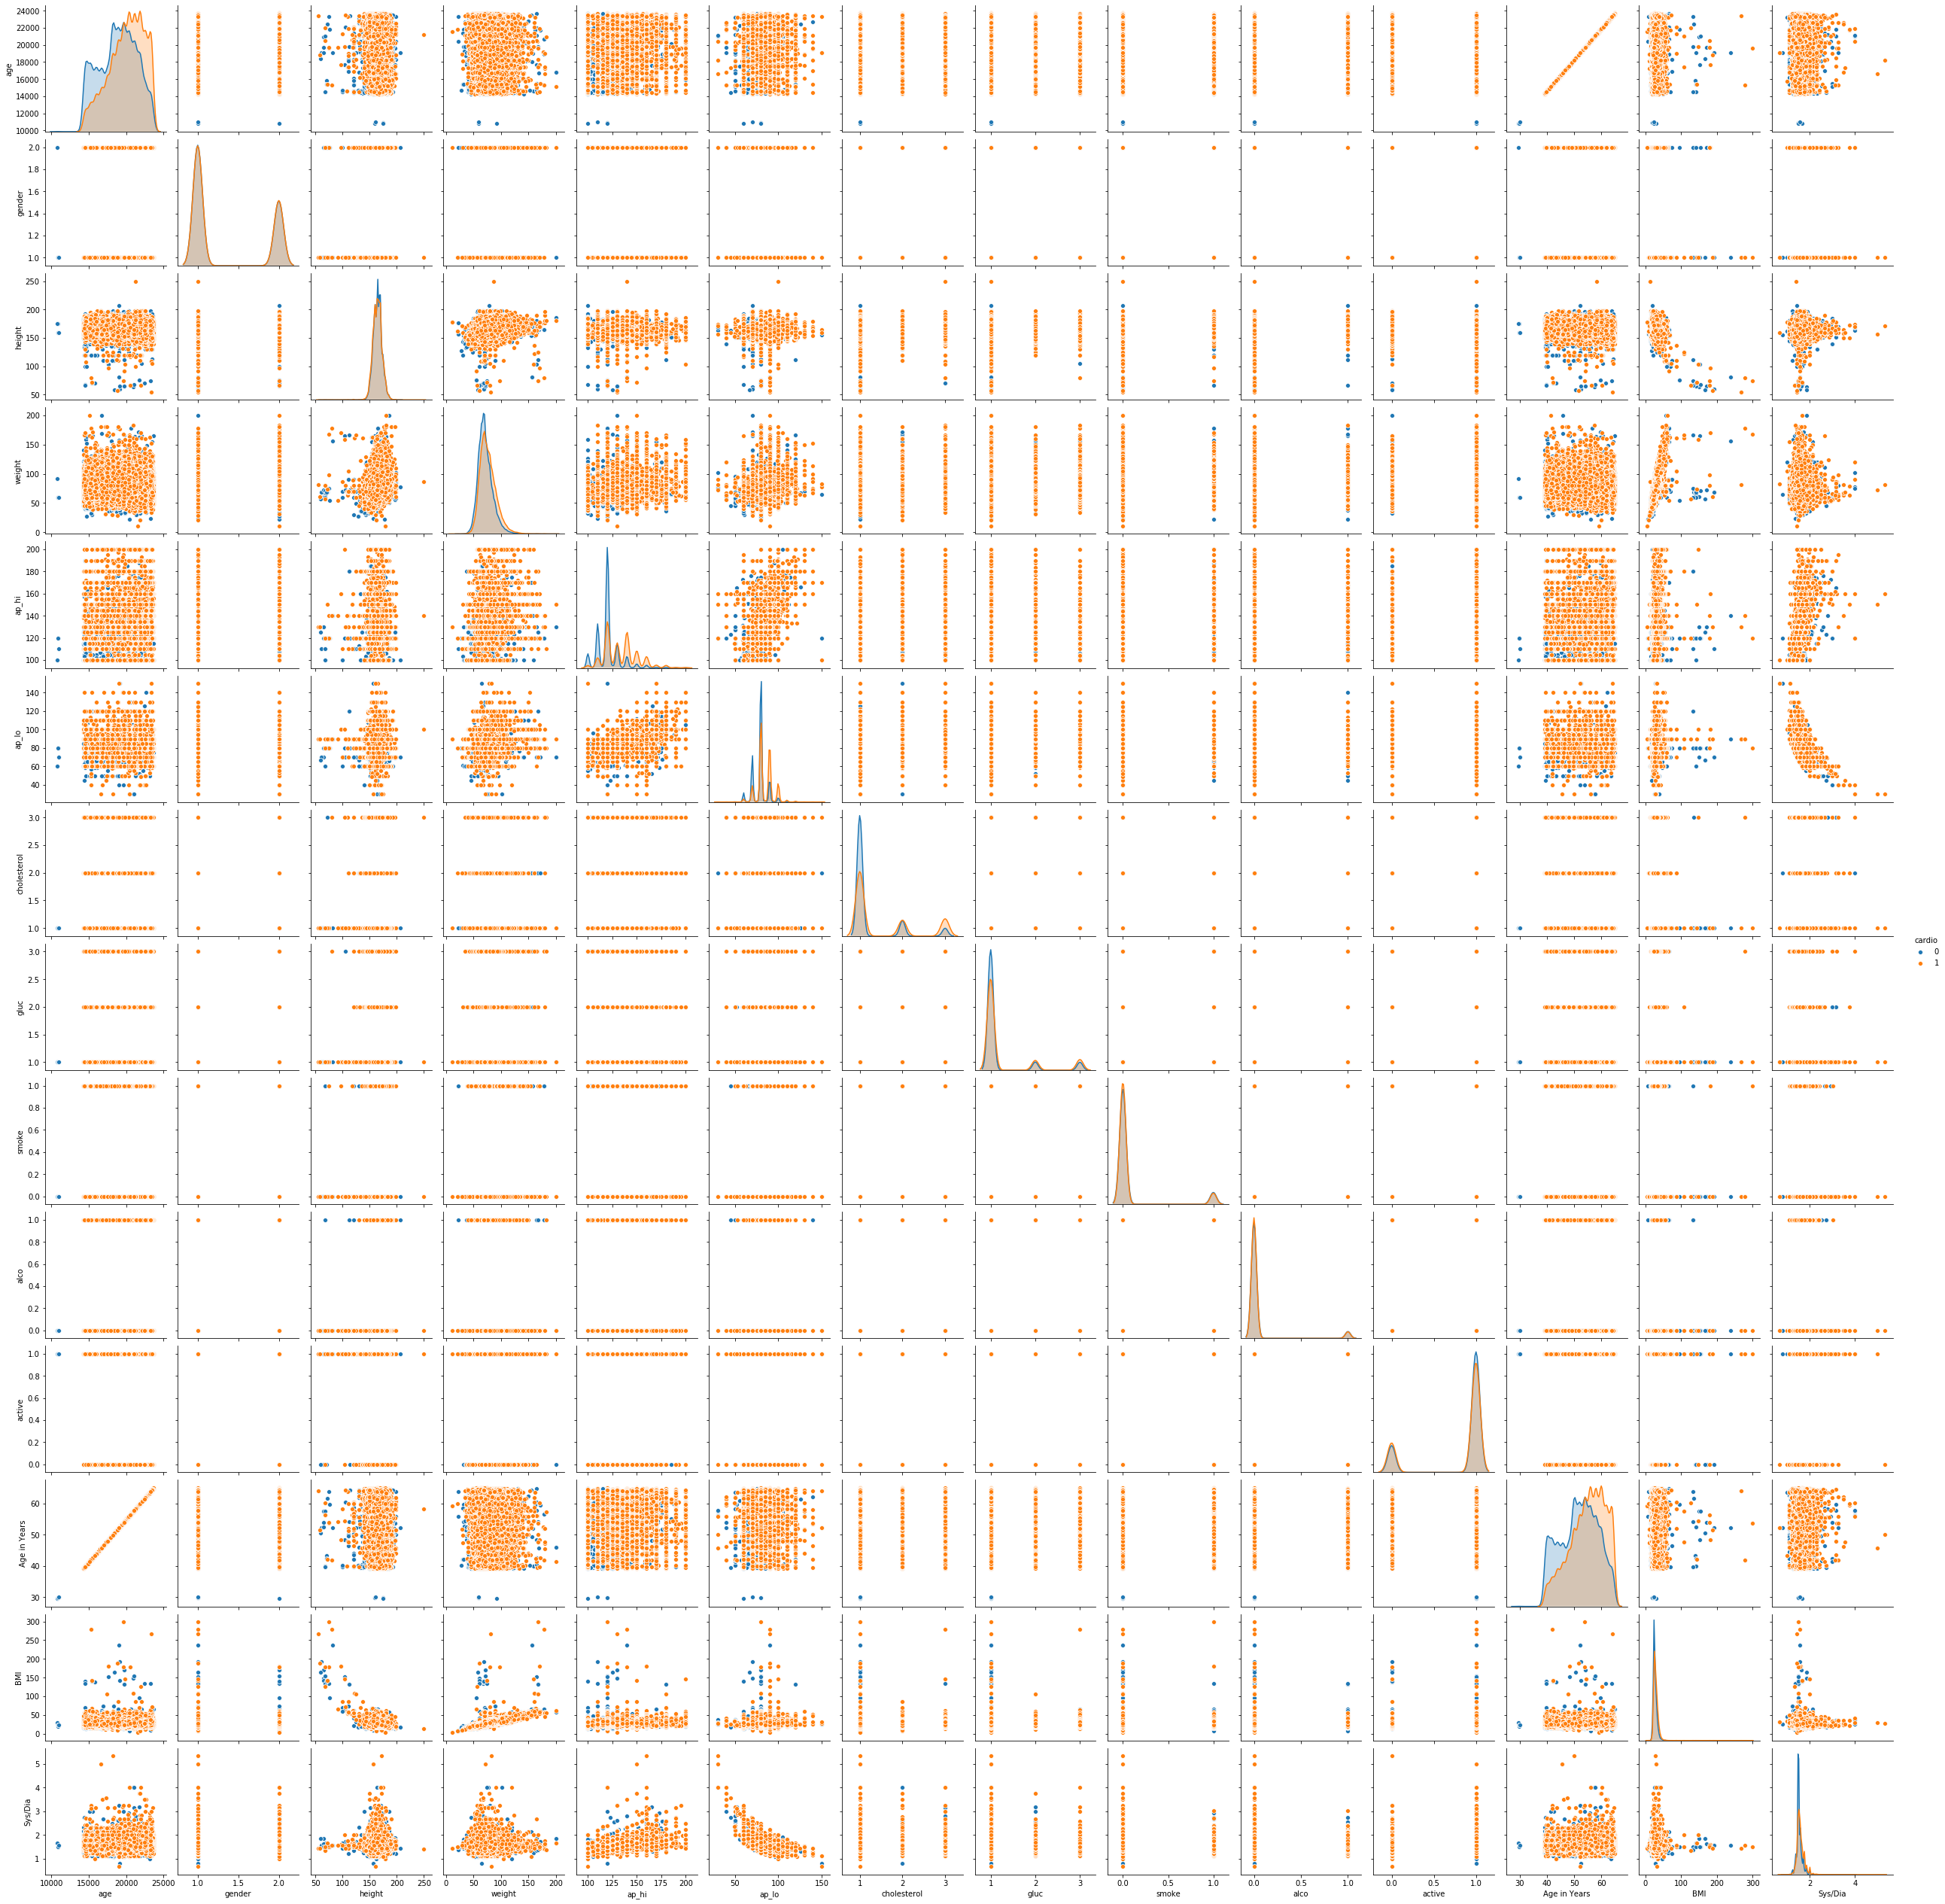

In [68]:
sns.distributions._has_statsmodels = False
sns.pairplot(data, hue='cardio')

# Feature Reduction

In [69]:
X

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  Age in Years        BMI   Sys/Dia  
0           1     50.391781  21.967120  1.375000  
1           1     55.419178  34.927679  1.555556  
2           0     51.663014  23.507805  1.857143  
3           1     48.282192  28.710479  1.500000  
4           0     47.873973  23.011177  1.666667  
...       ...           ...        ...       ...  
69995       1     52.712329  26.927438  1.500000  
69996       1     61.920548  50.472681  1.555556  
69997       0     52.235616  31.353579  2.000000  
69998       0     61.454795  27.099251  1.687500  
69999       1     56.273973  24.913495  1.500000  

[67560 rows x 13 columns]

In [70]:
X_red=X.copy(deep=True)

In [71]:
X_red=X_red.drop(['smoke','alco','gender','active','height','ap_lo','Sys/Dia','gluc','BMI'],axis=1)
X_red

weight  ap_hi  cholesterol  Age in Years
0        62.0    110            1     50.391781
1        85.0    140            3     55.419178
2        64.0    130            3     51.663014
3        82.0    150            1     48.282192
4        56.0    100            1     47.873973
...       ...    ...          ...           ...
69995    76.0    120            1     52.712329
69996   126.0    140            2     61.920548
69997   105.0    180            3     52.235616
69998    72.0    135            1     61.454795
69999    72.0    120            2     56.273973

[67560 rows x 4 columns]

In [72]:
X_train_red, X_test_red, y_train, y_test = train_test_split(X_red, y, test_size = 0.2, random_state=42)
X_train_red

weight  ap_hi  cholesterol  Age in Years
61241    58.0    130            1     59.884932
12928    61.0    110            1     40.021918
37610    84.0    120            2     50.189041
41092    43.0    110            1     39.986301
20741    56.0    120            1     54.106849
...       ...    ...          ...           ...
38521    54.0    120            1     40.073973
6491     83.0    120            1     57.416438
56843    60.0    120            1     49.389041
883      70.0    110            1     43.794521
16357    70.0    120            1     61.446575

[54048 rows x 4 columns]

Logistic Regression:  0.7209147424511545
Precision Score:      0.7578536254032943
Recall Score:         0.6555522914218567
F1 Score:             0.7030007088288572
Cross Validation Scores:  [0.72201665 0.72562442 0.72173913 0.7194005  0.72291609]


Feature  Co-efficient
2   cholesterol      0.436104
1         ap_hi      0.062559
3  Age in Years      0.052078
0        weight      0.010136

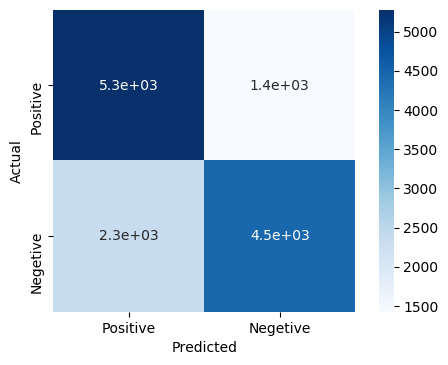

In [320]:
lm_red=LogisticRegression(C=0.01)
log_reg_results(lm_red,X_train_red,y_train,X_test_red,y_test)

Random Forest:        0.6642243931320307
Precision Score:      0.663829173279469
Recall Score:         0.675822561692127
F1 Score:             0.6697721813814689
Cross Validation Scores:  [0.67567068 0.68177613 0.673358   0.68137663 0.67129244]


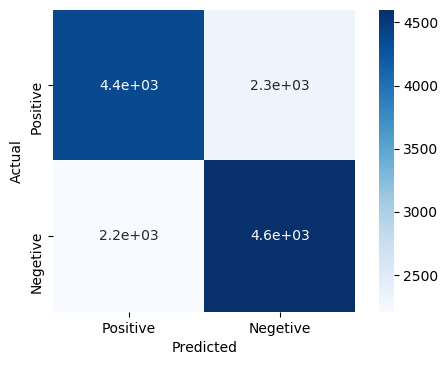

In [321]:
rf_red=RandomForestClassifier()
rf_results(rf_red,X_train_red,y_train,X_test_red,y_test)

In [333]:
from sklearn.metrics import roc_auc_score, roc_curve

#lm_fpr_bl, lm_tpr_bl, thresholds = roc_curve(y_test, lm_bl.predict_proba(X_test)[:,1])
#rf_fpr_bl, rf_tpr_bl, thresholds = roc_curve(y_test, rf_bl.predict_proba(X_test)[:,1])
#knn_fpr_bl, knn_tpr_bl, thresholds = roc_curve(y_test, knn_bl.predict_proba(X_test)[:,1])
#lm_fpr_bl_std, lm_tpr_bl_std, thresholds = roc_curve(y_test, lm_bl_std.predict_proba(X_test_std)[:,1])
#rf_fpr_bl_std, rf_tpr_bl_std, thresholds = roc_curve(y_test, rf_bl_std.predict_proba(X_test_std)[:,1])
#knn_fpr_bl_std, knn_tpr_bl_std, thresholds = roc_curve(y_test, knn_bl_std.predict_proba(X_test_std)[:,1])

lm_fpr_bmi, lm_tpr_bmi, thresholds = roc_curve(y_test, lm_bmi.predict_proba(X_test_bmi)[:,1])
rf_fpr_bmi, rf_tpr_bmi, thresholds = roc_curve(y_test, rf_bmi.predict_proba(X_test_bmi)[:,1])
knn_fpr_bmi, knn_tpr_bmi, thresholds = roc_curve(y_test, knn_bmi.predict_proba(X_test_bmi)[:,1])
#lm_fpr_bmi_std, lm_tpr_bmi_std, thresholds = roc_curve(y_test, lm_bmi_std.predict_proba(X_test_std_bmi)[:,1])
#rf_fpr_bmi_std, rf_tpr_bmi_std, thresholds = roc_curve(y_test, rf_bmi_std.predict_proba(X_test_std_bmi)[:,1])

#lm_fpr_bp, lm_tpr_bp, thresholds = roc_curve(y_test, lm_bp.predict_proba(X_test_bp)[:,1])
#rf_fpr_bp, rf_tpr_bp, thresholds = roc_curve(y_test, rf_bp.predict_proba(X_test_bp)[:,1])
#knn_fpr_bp, knn_tpr_bp, thresholds = roc_curve(y_test, knn_bp.predict_proba(X_test_bp)[:,1])
#lm_fpr_bp_std, lm_tpr_bp_std, thresholds = roc_curve(y_test, lm_bp_std.predict_proba(X_test_std_bp)[:,1])
#rf_fpr_bp_std, rf_tpr_bp_std, thresholds = roc_curve(y_test, rf_bp_std.predict_proba(X_test_std_bp)[:,1])
#knn_fpr_bp_std, knn_tpr_bp_std, thresholds = roc_curve(y_test, knn_bp_std.predict_proba(X_test_std_bp)[:,1])

#lm_fpr_red, lm_tpr_red, thresholds = roc_curve(y_test, lm_red.predict_proba(X_test_red)[:,1])
#rf_fpr_red, rf_tpr_red, thresholds = roc_curve(y_test, rf_red.predict_proba(X_test_red)[:,1])

ROC AUC score (lm_bmi)=  0.7871460033857403
ROC AUC score (rf_bmi)=  0.771098443165979
ROC AUC score (knn_bmi)=  0.7301220100457415


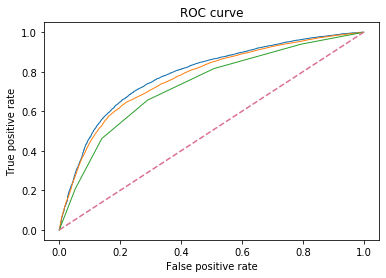

In [334]:
#plt.plot(lm_fpr_bl, lm_tpr_bl,lw=1)
#plt.plot(rf_fpr_bl, rf_tpr_bl,lw=1)
#plt.plot(knn_fpr_bl, knn_tpr_bl,lw=1)
#plt.plot(lm_fpr_bl_std, lm_tpr_bl_std,lw=1)
#plt.plot(rf_fpr_bl_std, rf_tpr_bl_std,lw=1)
#plt.plot(knn_fpr_bl_std, knn_tpr_bl_std,lw=1)

plt.plot(lm_fpr_bmi, lm_tpr_bmi,lw=1)
plt.plot(rf_fpr_bmi, rf_tpr_bmi,lw=1)
plt.plot(knn_fpr_bmi, knn_tpr_bmi,lw=1)
#plt.plot(lm_fpr_bmi_std, lm_tpr_bmi_std,lw=1)
#plt.plot(rf_fpr_bmi_std, rf_tpr_bmi_std,lw=1)

#plt.plot(lm_fpr_bp, lm_tpr_bp,lw=1)
#plt.plot(rf_fpr_bp, rf_tpr_bp,lw=1)
#plt.plot(knn_fpr_bp, knn_tpr_bp,lw=1)
#plt.plot(lm_fpr_bp_std, lm_tpr_bp_std,lw=1)
#plt.plot(rf_fpr_bp_std, rf_tpr_bp_std,lw=1)
#plt.plot(knn_fpr_bp_std, knn_tpr_bp_std,lw=1)

#plt.plot(lm_fpr_red, lm_tpr_red,lw=1)
#plt.plot(rf_fpr_red, rf_tpr_red,lw=1)

plt.plot([0,1],[0,1],c='palevioletred',ls='--')


plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
#print("ROC AUC score (lm_bl)= ", roc_auc_score(y_test, lm_bl.predict_proba(X_test)[:,1]))
#print("ROC AUC score (rf_bl)= ", roc_auc_score(y_test, rf_bl.predict_proba(X_test)[:,1]))
#print("ROC AUC score (knn_bl)= ", roc_auc_score(y_test, knn_bl.predict_proba(X_test)[:,1]))
#print("ROC AUC score (lm_bl_std)= ", roc_auc_score(y_test, lm_bl_std.predict_proba(X_test_std)[:,1]))
#print("ROC AUC score (rf_bl_std)= ", roc_auc_score(y_test, rf_bl_std.predict_proba(X_test_std)[:,1]))
#print("ROC AUC score (knn_bl_std)= ", roc_auc_score(y_test, knn_bl_std.predict_proba(X_test_std)[:,1]))

print("ROC AUC score (lm_bmi)= ", roc_auc_score(y_test, lm_bmi.predict_proba(X_test_bmi)[:,1]))
print("ROC AUC score (rf_bmi)= ", roc_auc_score(y_test, rf_bmi.predict_proba(X_test_bmi)[:,1]))
print("ROC AUC score (knn_bmi)= ", roc_auc_score(y_test, knn_bmi.predict_proba(X_test_bmi)[:,1]))
#print("ROC AUC score (lm_bmi_std)= ", roc_auc_score(y_test, lm_bmi_std.predict_proba(X_test_std_bmi)[:,1]))
#print("ROC AUC score (rf_bmi_std)= ", roc_auc_score(y_test, rf_bmi_std.predict_proba(X_test_std_bmi)[:,1]))

#print("ROC AUC score (lm_bp)= ", roc_auc_score(y_test, lm_bp.predict_proba(X_test_bp)[:,1]))
#print("ROC AUC score (rf_bp)= ", roc_auc_score(y_test, rf_bp.predict_proba(X_test_bp)[:,1]))
#print("ROC AUC score (knn_bp)= ", roc_auc_score(y_test, knn_bp.predict_proba(X_test_bp)[:,1]))
#print("ROC AUC score (lm_bp_std)= ", roc_auc_score(y_test, lm_bp_std.predict_proba(X_test_std_bp)[:,1]))
#print("ROC AUC score (rf_bp_std)= ", roc_auc_score(y_test, rf_bp_std.predict_proba(X_test_std_bp)[:,1]))
#print("ROC AUC score (knn_bp_std)= ", roc_auc_score(y_test, knn_bp_std.predict_proba(X_test_std_bp)[:,1]))

#print("ROC AUC score (lm_red)= ", roc_auc_score(y_test, lm_red.predict_proba(X_test_red)[:,1]))
#print("ROC AUC score (rf_red)= ", roc_auc_score(y_test, rf_red.predict_proba(X_test_red)[:,1]))

# Hyper Parameter Tuning

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
lm=LogisticRegression()
Cs= np.logspace(-3,3, num=7)
param_grid=dict(C=Cs)

In [87]:
lm_cv=GridSearchCV(lm, param_grid, cv=5)
lm_cv.fit(X_train_std,y_train)
print(lm_cv.best_score_)
print(lm_cv.best_params_)

0.7257066998592755
{'C': 0.01}


# Analysis By Age

In [117]:
data=data.drop('age', axis=1)
data

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  cardio  Age in Years        BMI   Sys/Dia  
0           1       0     50.391781  21.967120  1.375000  
1           1       1     55.419178  34.927679  1.555556  
2           0       1     51.663014  23.507805  1.857143  
3           1       1     48.282192  28.710479  1.500000  
4           0       0     47.873973  23.011177  1.666667  
...       ...     ...           ...        ...       ...  
69995       1       0     52.712329  26.927438  1.500000  
69996       1       1     61.920548  50.472681  1.555556  
69997       0       1     52.235616  31.353579  2.000000  
69998       0       1     61.454795  27.099251  1.687500  
69999       1       0     56.273973  24.913495  1.500000  

[67560 rows x 14 columns]

In [118]:
data_age=data.copy(deep=True)
data_age

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  cardio  Age in Years        BMI   Sys/Dia  
0           1       0     50.391781  21.967120  1.375000  
1           1       1     55.419178  34.927679  1.555556  
2           0       1     51.663014  23.507805  1.857143  
3           1       1     48.282192  28.710479  1.500000  
4           0       0     47.873973  23.011177  1.666667  
...       ...     ...           ...        ...       ...  
69995       1       0     52.712329  26.927438  1.500000  
69996       1       1     61.920548  50.472681  1.555556  
69997       0       1     52.235616  31.353579  2.000000  
69998       0       1     61.454795  27.099251  1.687500  
69999       1       0     56.273973  24.913495  1.500000  

[67560 rows x 14 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a93e84d50>]],
      dtype=object)

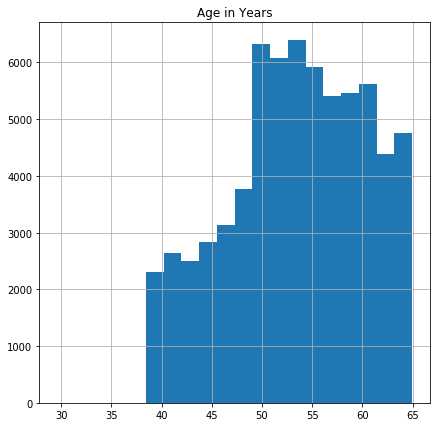

In [204]:
data_age.hist(column=['Age in Years'], figsize=(7,7), bins=20)

In [121]:
data_age['age_category']=age_category(data_age,'Age in Years')

In [122]:
def age_category(df_name, col_name):
    age_cat=[]
    for age in df_name[col_name]:
        if age<50:
            cat='low'
        elif age<60:
            cat='medium'
        else:
            cat='high'
        age_cat.append(cat)
    return age_cat
        

In [123]:
data_age

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  cardio  Age in Years        BMI   Sys/Dia age_category  
0           1       0     50.391781  21.967120  1.375000       medium  
1           1       1     55.419178  34.927679  1.555556       medium  
2           0       1     51.663014  23.507805  1.857143       medium  
3           1       1     48.282192  28.710479  1.500000          low  
4           0       0     47.873973  23.011177  1.666667          low  
...       ...     ...           ...        ...       ...          ...  
69995       1       0     52.712329  26.927438  1.500000       medium  
69996       1       1     61.920548  50.472681  1.555556         high  
69997       0       1     52.235616  31.353579  2.000000       medium  
69998       0       1     61.454795  27.099251  1.687500         high  
69999       1       0     56.273973  24.913495  1.500000       medium  

[67560 rows x 15 columns]

In [124]:
data_low_age=data_age[data_age.age_category == 'low']
data_med_age=data_age[data_age.age_category == 'medium']
data_high_age=data_age[data_age.age_category == 'high']

In [125]:
data_low_age

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
8           1     158    71.0    110     70            1     1      0     0   
12          2     165    60.0    120     80            1     1      0     0   
14          2     181    95.0    130     90            1     1      1     1   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69981       2     182   110.0    130     90            2     2      0     0   
69984       2     168    80.0    120     80            1     1      0     0   
69985       1     156   102.0    130     80            1     1      0     1   
69986       2     180    78.0    120     80            1     1      0     0   
69990       1     168    72.0    110     70            1     1      0     0   

       active  cardio  Age in Years        BMI   Sys/Dia age_category  
3           1       1     48.282192  28.710479  1.500000          low  
4           0       0     47.873973  23.011177  1.666667          low  
8           1       0     48.405479  28.440955  1.571429          low  
12          0       0     40.523288  22.038567  1.500000          low  
14          1       0     39.813699  28.997894  1.444444          low  
...       ...     ...           ...        ...       ...          ...  
69981       1       1     47.945205  33.208550  1.444444          low  
69984       1       1     49.112329  28.344671  1.500000          low  
69985       0       1     49.846575  41.913215  1.625000          low  
69986       1       0     49.857534  24.074074  1.500000          low  
69990       1       1     41.353425  25.510204  1.571429          low  

[20480 rows x 15 columns]

# Age Below 50

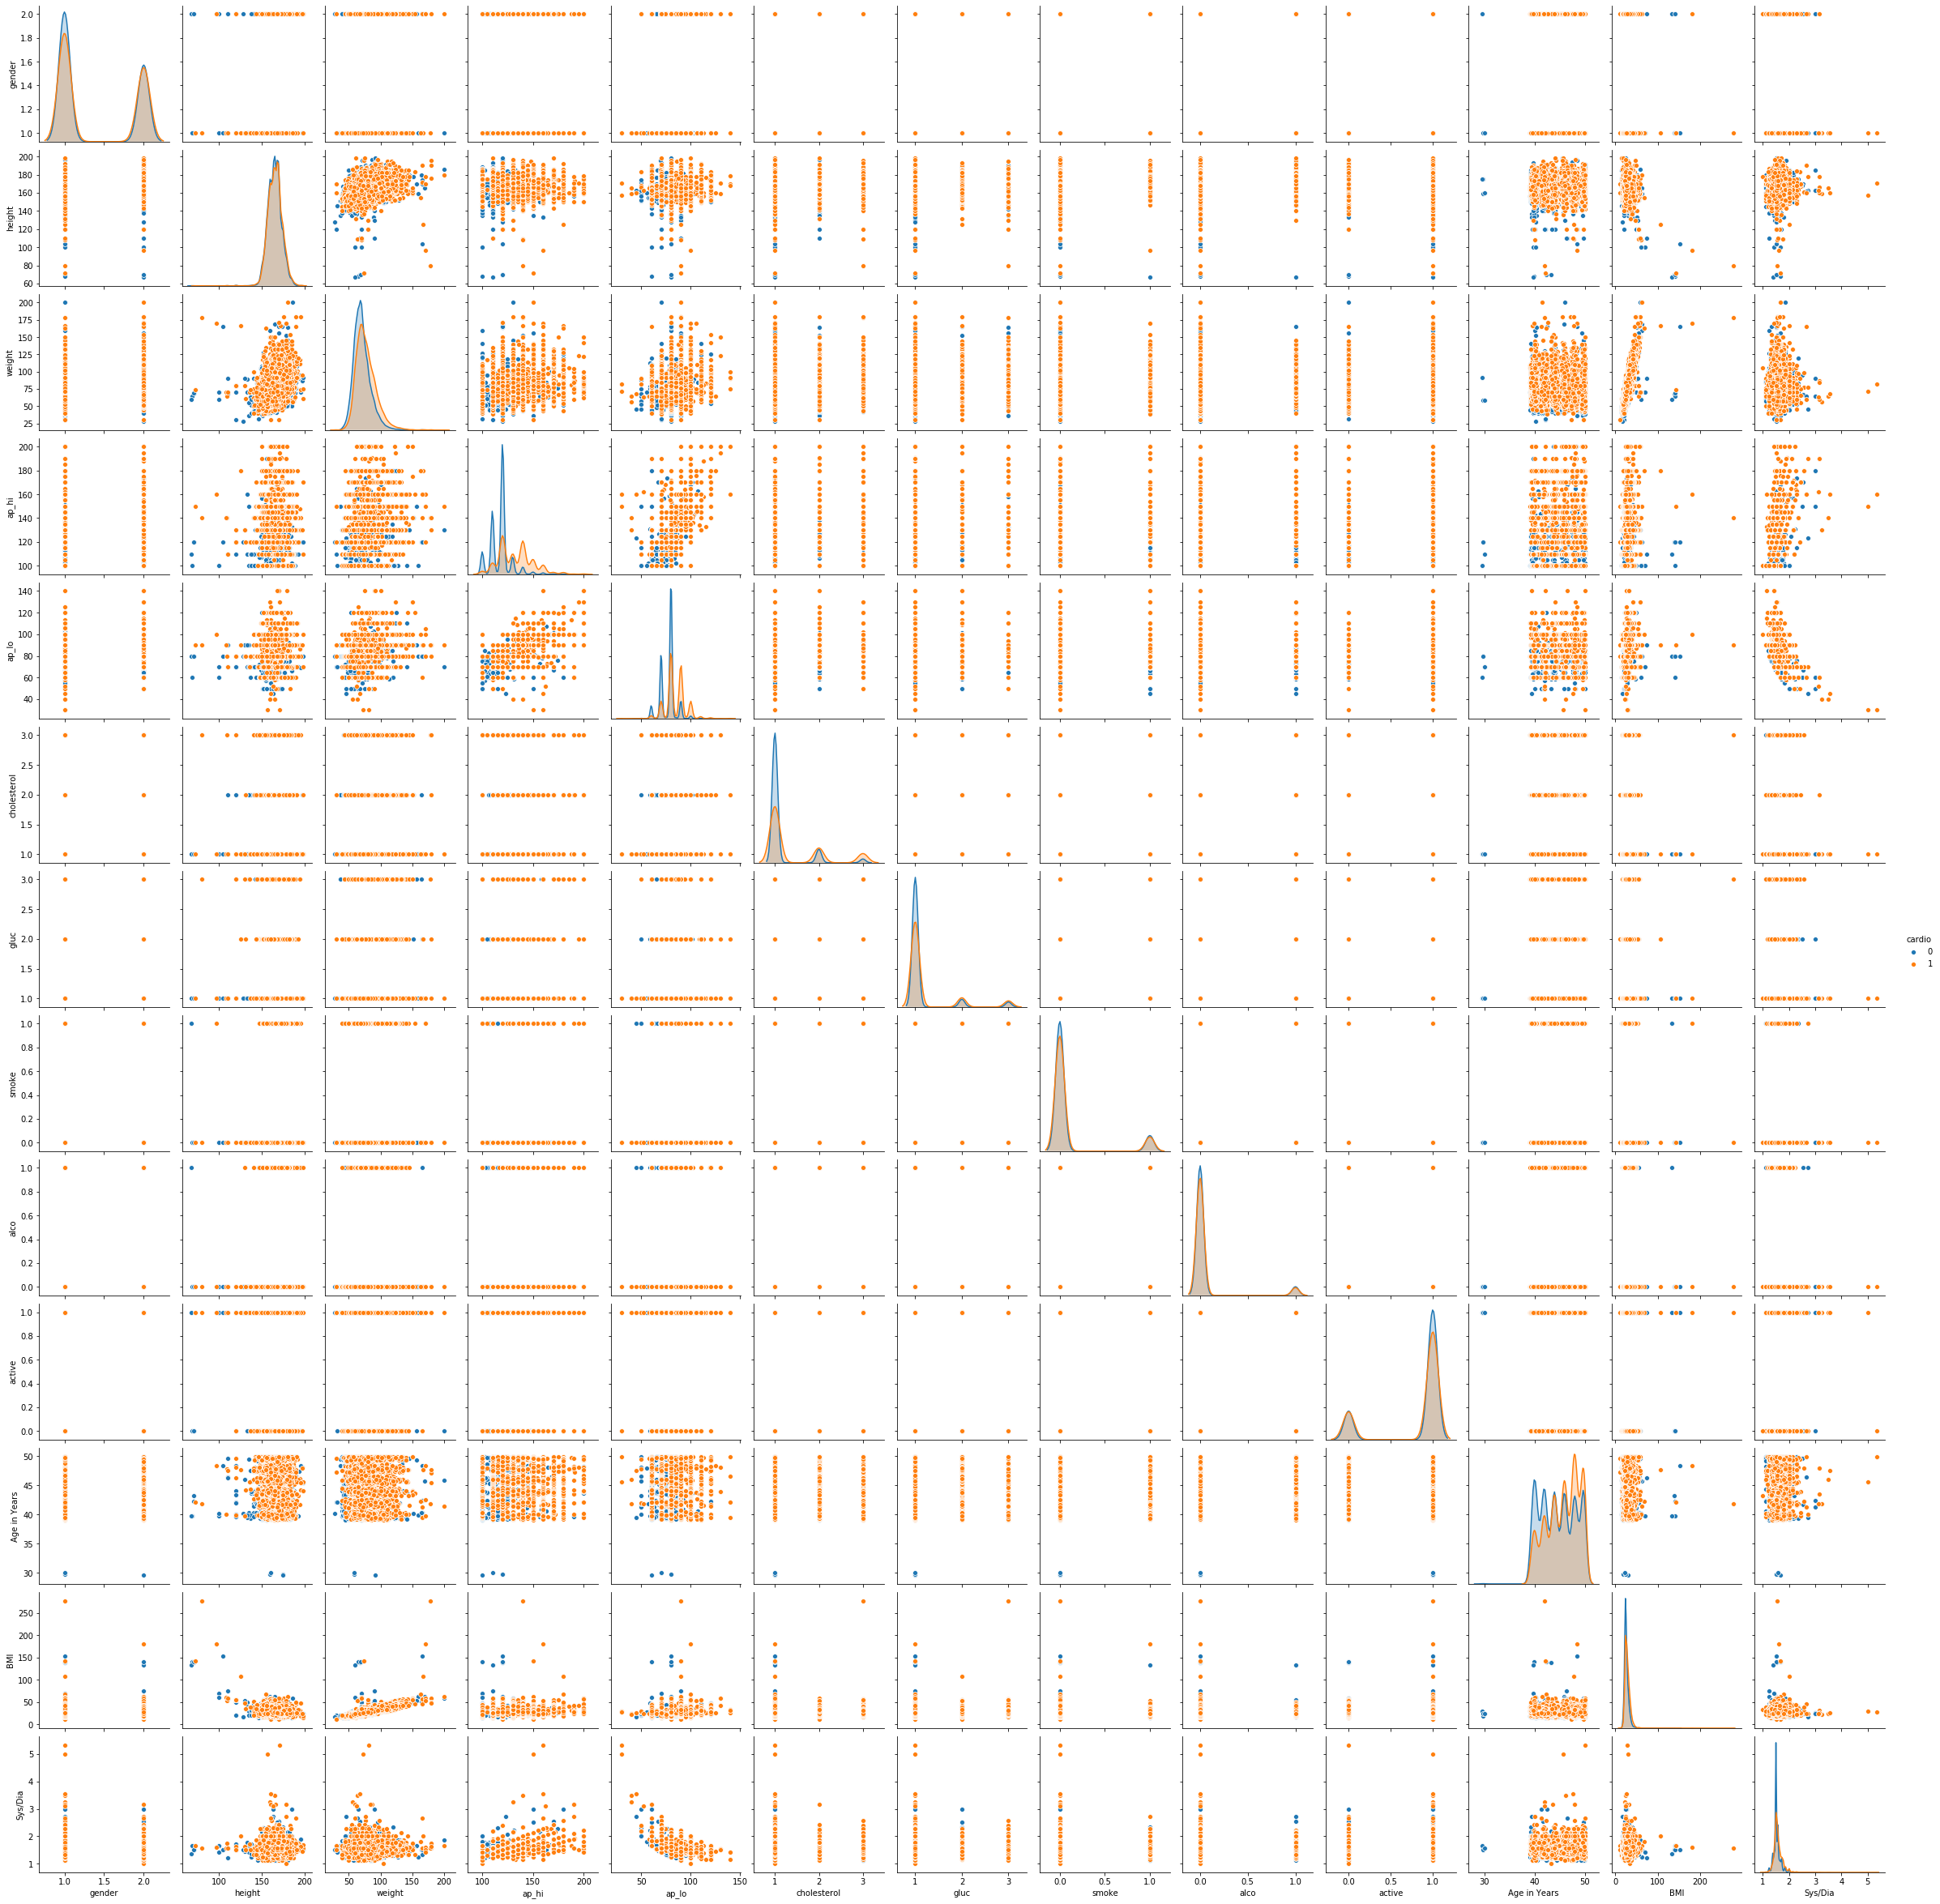

In [126]:
sns.distributions._has_statsmodels = False
sns.pairplot(data_low_age, hue='cardio')

In [136]:
X_low_age=data_low_age.drop('cardio',axis=1)
y_low=data_low_age.cardio
X_low_age=X_low_age.drop('age_category',axis=1)

In [137]:
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low_age, y_low, test_size = 0.2, random_state=42)
X_train_low

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
69742       2     175    89.0    140     90            3     3      0     0   
6664        1     167    75.0    120     80            1     1      0     0   
21153       2     161    66.0    130     90            3     1      0     0   
29207       1     154    80.0    160    100            1     1      0     0   
58654       2     169    69.0    150    100            2     1      1     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
38264       2     176    82.0    120     80            1     1      0     0   
40540       1     171    70.0    120     70            1     1      0     0   
18149       1     157    55.0    120     80            1     1      0     0   
2987        2     176    63.0    120     80            1     1      0     0   
53997       1     164    65.0    120     70            1     1      0     0   

       active  Age in Years        BMI   Sys/Dia  
69742       0     43.438356  29.061224  1.555556  
6664        1     49.723288  26.892323  1.500000  
21153       1     43.687671  25.461981  1.444444  
29207       1     47.835616  33.732501  1.600000  
58654       0     49.789041  24.158818  1.500000  
...       ...           ...        ...       ...  
38264       1     48.438356  26.472107  1.500000  
40540       1     47.460274  23.938990  1.714286  
18149       1     49.991781  22.313278  1.500000  
2987        1     48.038356  20.338326  1.500000  
53997       1     45.961644  24.167162  1.714286  

[16384 rows x 13 columns]

In [190]:


def log_reg_results(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    print('Logistic Regression: ', model.score(X_test,y_test))
    predictions_model=model.predict(X_test)
    print('Precision Score:     ', precision_score(y_test, predictions_model))
    print('Recall Score:        ', recall_score(y_test, predictions_model))
    print('F1 Score:            ', f1_score(y_test, predictions_model))
    print('Cross Validation Scores: ',cross_val_score(model, X_train, y_train, cv=5))
    cm_model=confusion_matrix(y_test, predictions_model)
    plt.figure(dpi=100)
    sns.heatmap(cm_model, cmap=plt.cm.Blues, annot=True, square=True,
               xticklabels=['Positive','Negetive'],
               yticklabels=['Positive','Negetive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return coef_table(model,X_train, y_train)


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Logistic Regression:  0.781005859375
Precision Score:      0.7861111111111111
Recall Score:         0.5603960396039604
F1 Score:             0.654335260115607


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Cross Validation Scores:  [0.79829112 0.77815075 0.78730546 0.79859628 0.77899878]


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature  Co-efficient
5    cholesterol      0.672712
0         gender      0.132172
2         weight      0.092348
3          ap_hi      0.079229
10  Age in Years      0.045983
4          ap_lo      0.012376
6           gluc     -0.069198
1         height     -0.090427
12       Sys/Dia     -0.134983
7          smoke     -0.174498
9         active     -0.191237
11           BMI     -0.211661
8           alco     -0.305551

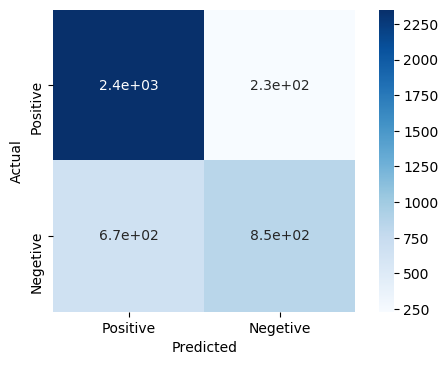

In [191]:
lm_low_age=LogisticRegression()
log_reg_results(lm_low_age,X_train_low,y_train_low,X_test_low,y_test_low)

# Age Below 60

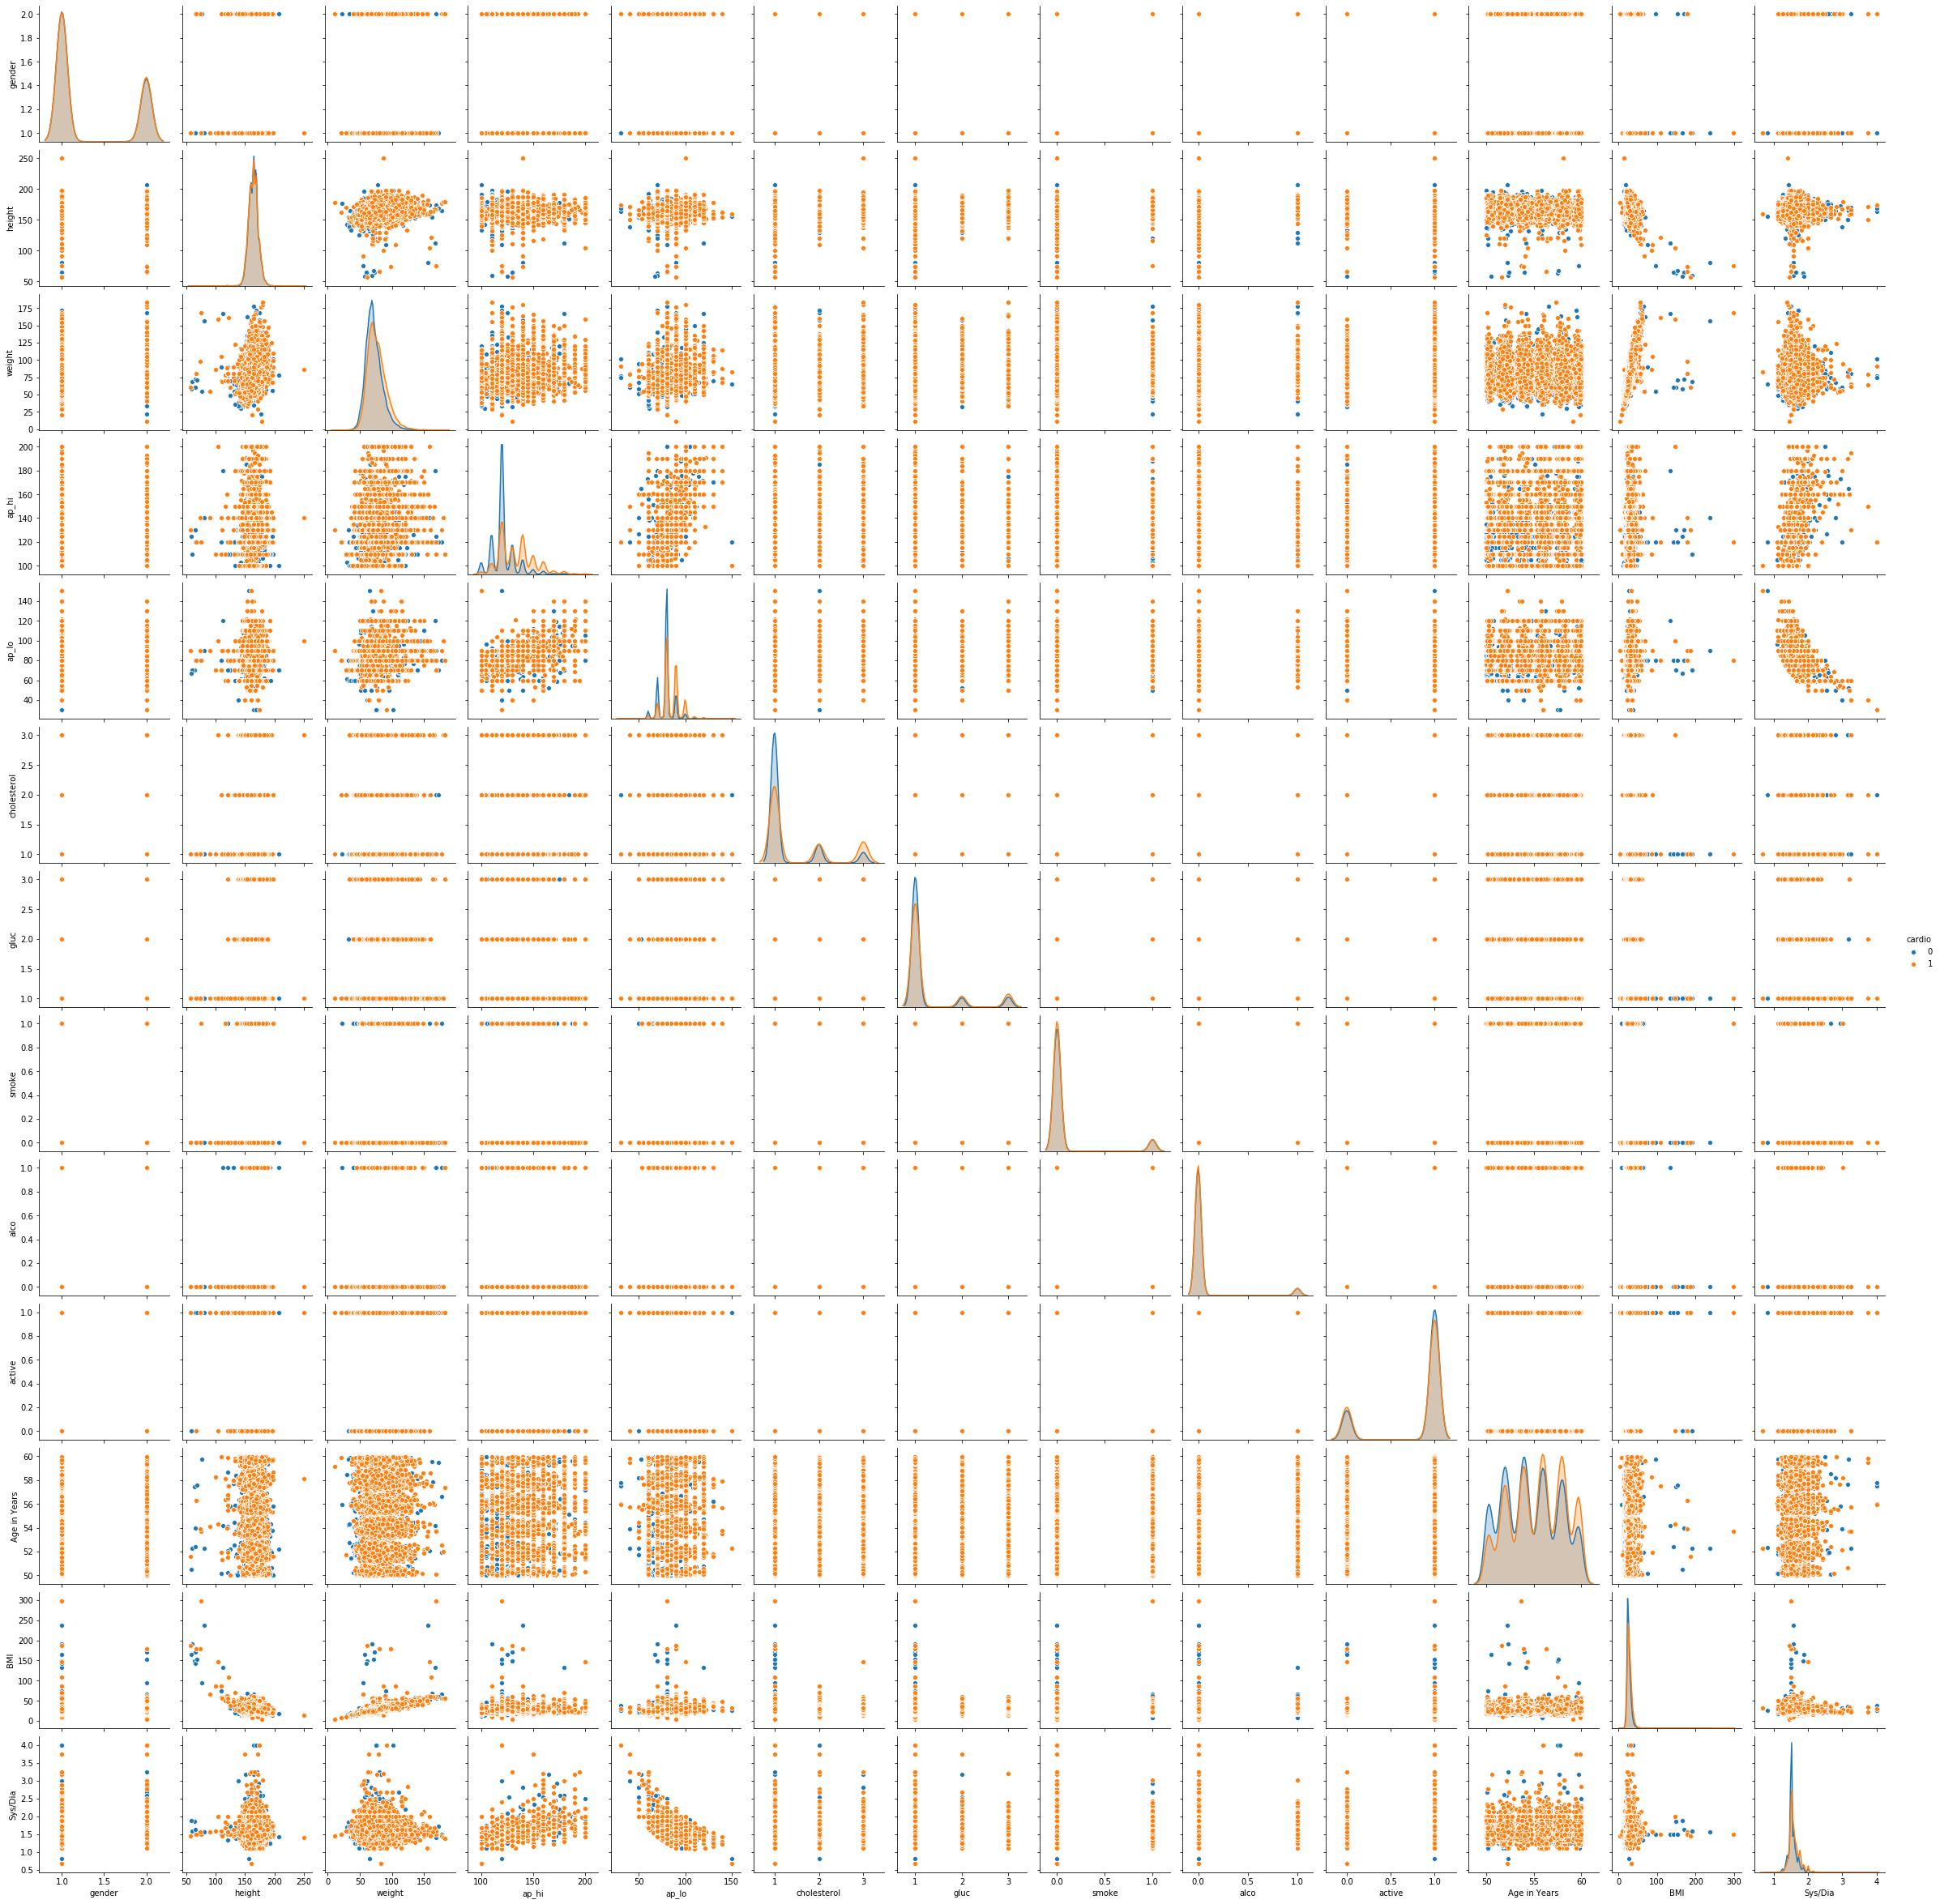

In [139]:
sns.distributions._has_statsmodels = False
sns.pairplot(data_med_age, hue='cardio')

In [140]:
X_med_age=data_med_age.drop('cardio',axis=1)
y_med=data_med_age.cardio
X_med_age=X_med_age.drop('age_category',axis=1)

In [141]:
X_train_med, X_test_med, y_train_med, y_test_med = train_test_split(X_med_age, y_med, test_size = 0.2, random_state=42)
X_train_med

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
57874       1     165    85.0    120     80            1     1      0     0   
1842        1     167   110.0    130     90            1     1      0     0   
7151        2     171    86.0    150     80            1     1      0     0   
60802       1     156    58.0    130     90            3     3      0     0   
69910       1     167    86.0    150     90            1     2      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
34498       1     167    78.0    120     80            1     1      0     0   
12828       1     171    97.0    110     60            1     1      0     0   
23094       1     152    70.0    120     79            1     1      0     0   
1785        2     168    66.0    110     70            1     1      0     0   
32389       1     167    76.0    140     90            1     1      0     0   

       active  Age in Years        BMI   Sys/Dia  
57874       1     54.109589  31.221304  1.500000  
1842        1     51.980822  39.442074  1.444444  
7151        1     55.887671  29.410759  1.875000  
60802       1     57.961644  23.833005  1.444444  
69910       1     57.550685  30.836531  1.666667  
...       ...           ...        ...       ...  
34498       0     56.287671  27.968016  1.500000  
12828       0     55.361644  33.172600  1.833333  
23094       1     58.479452  30.297784  1.518987  
1785        1     54.024658  23.384354  1.571429  
32389       1     57.660274  27.250887  1.555556  

[27504 rows x 13 columns]

/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Logistic Regression:  0.6980802792321117
Precision Score:      0.7374717103136114
Recall Score:         0.6434414668547249
F1 Score:             0.687255197348599


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Cross Validation Scores:  [0.7053263  0.71277949 0.70332667 0.71314306 0.69818182]


Feature  Co-efficient
5    cholesterol      0.477015
0         gender      0.069863
2         weight      0.063709
3          ap_hi      0.056764
10  Age in Years      0.037763
4          ap_lo      0.004934
1         height     -0.065284
12       Sys/Dia     -0.075405
8           alco     -0.121282
6           gluc     -0.123228
11           BMI     -0.137403
7          smoke     -0.166989
9         active     -0.308717

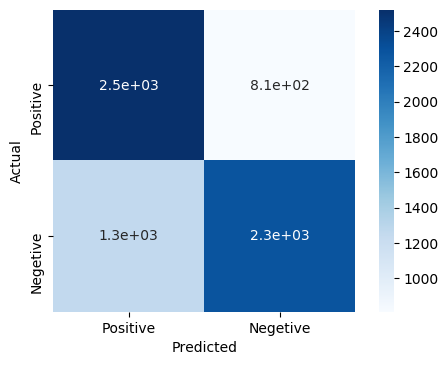

In [192]:
lm_med_age=LogisticRegression()
log_reg_results(lm_med_age,X_train_med,y_train_med,X_test_med,y_test_med)

# Age Above 60

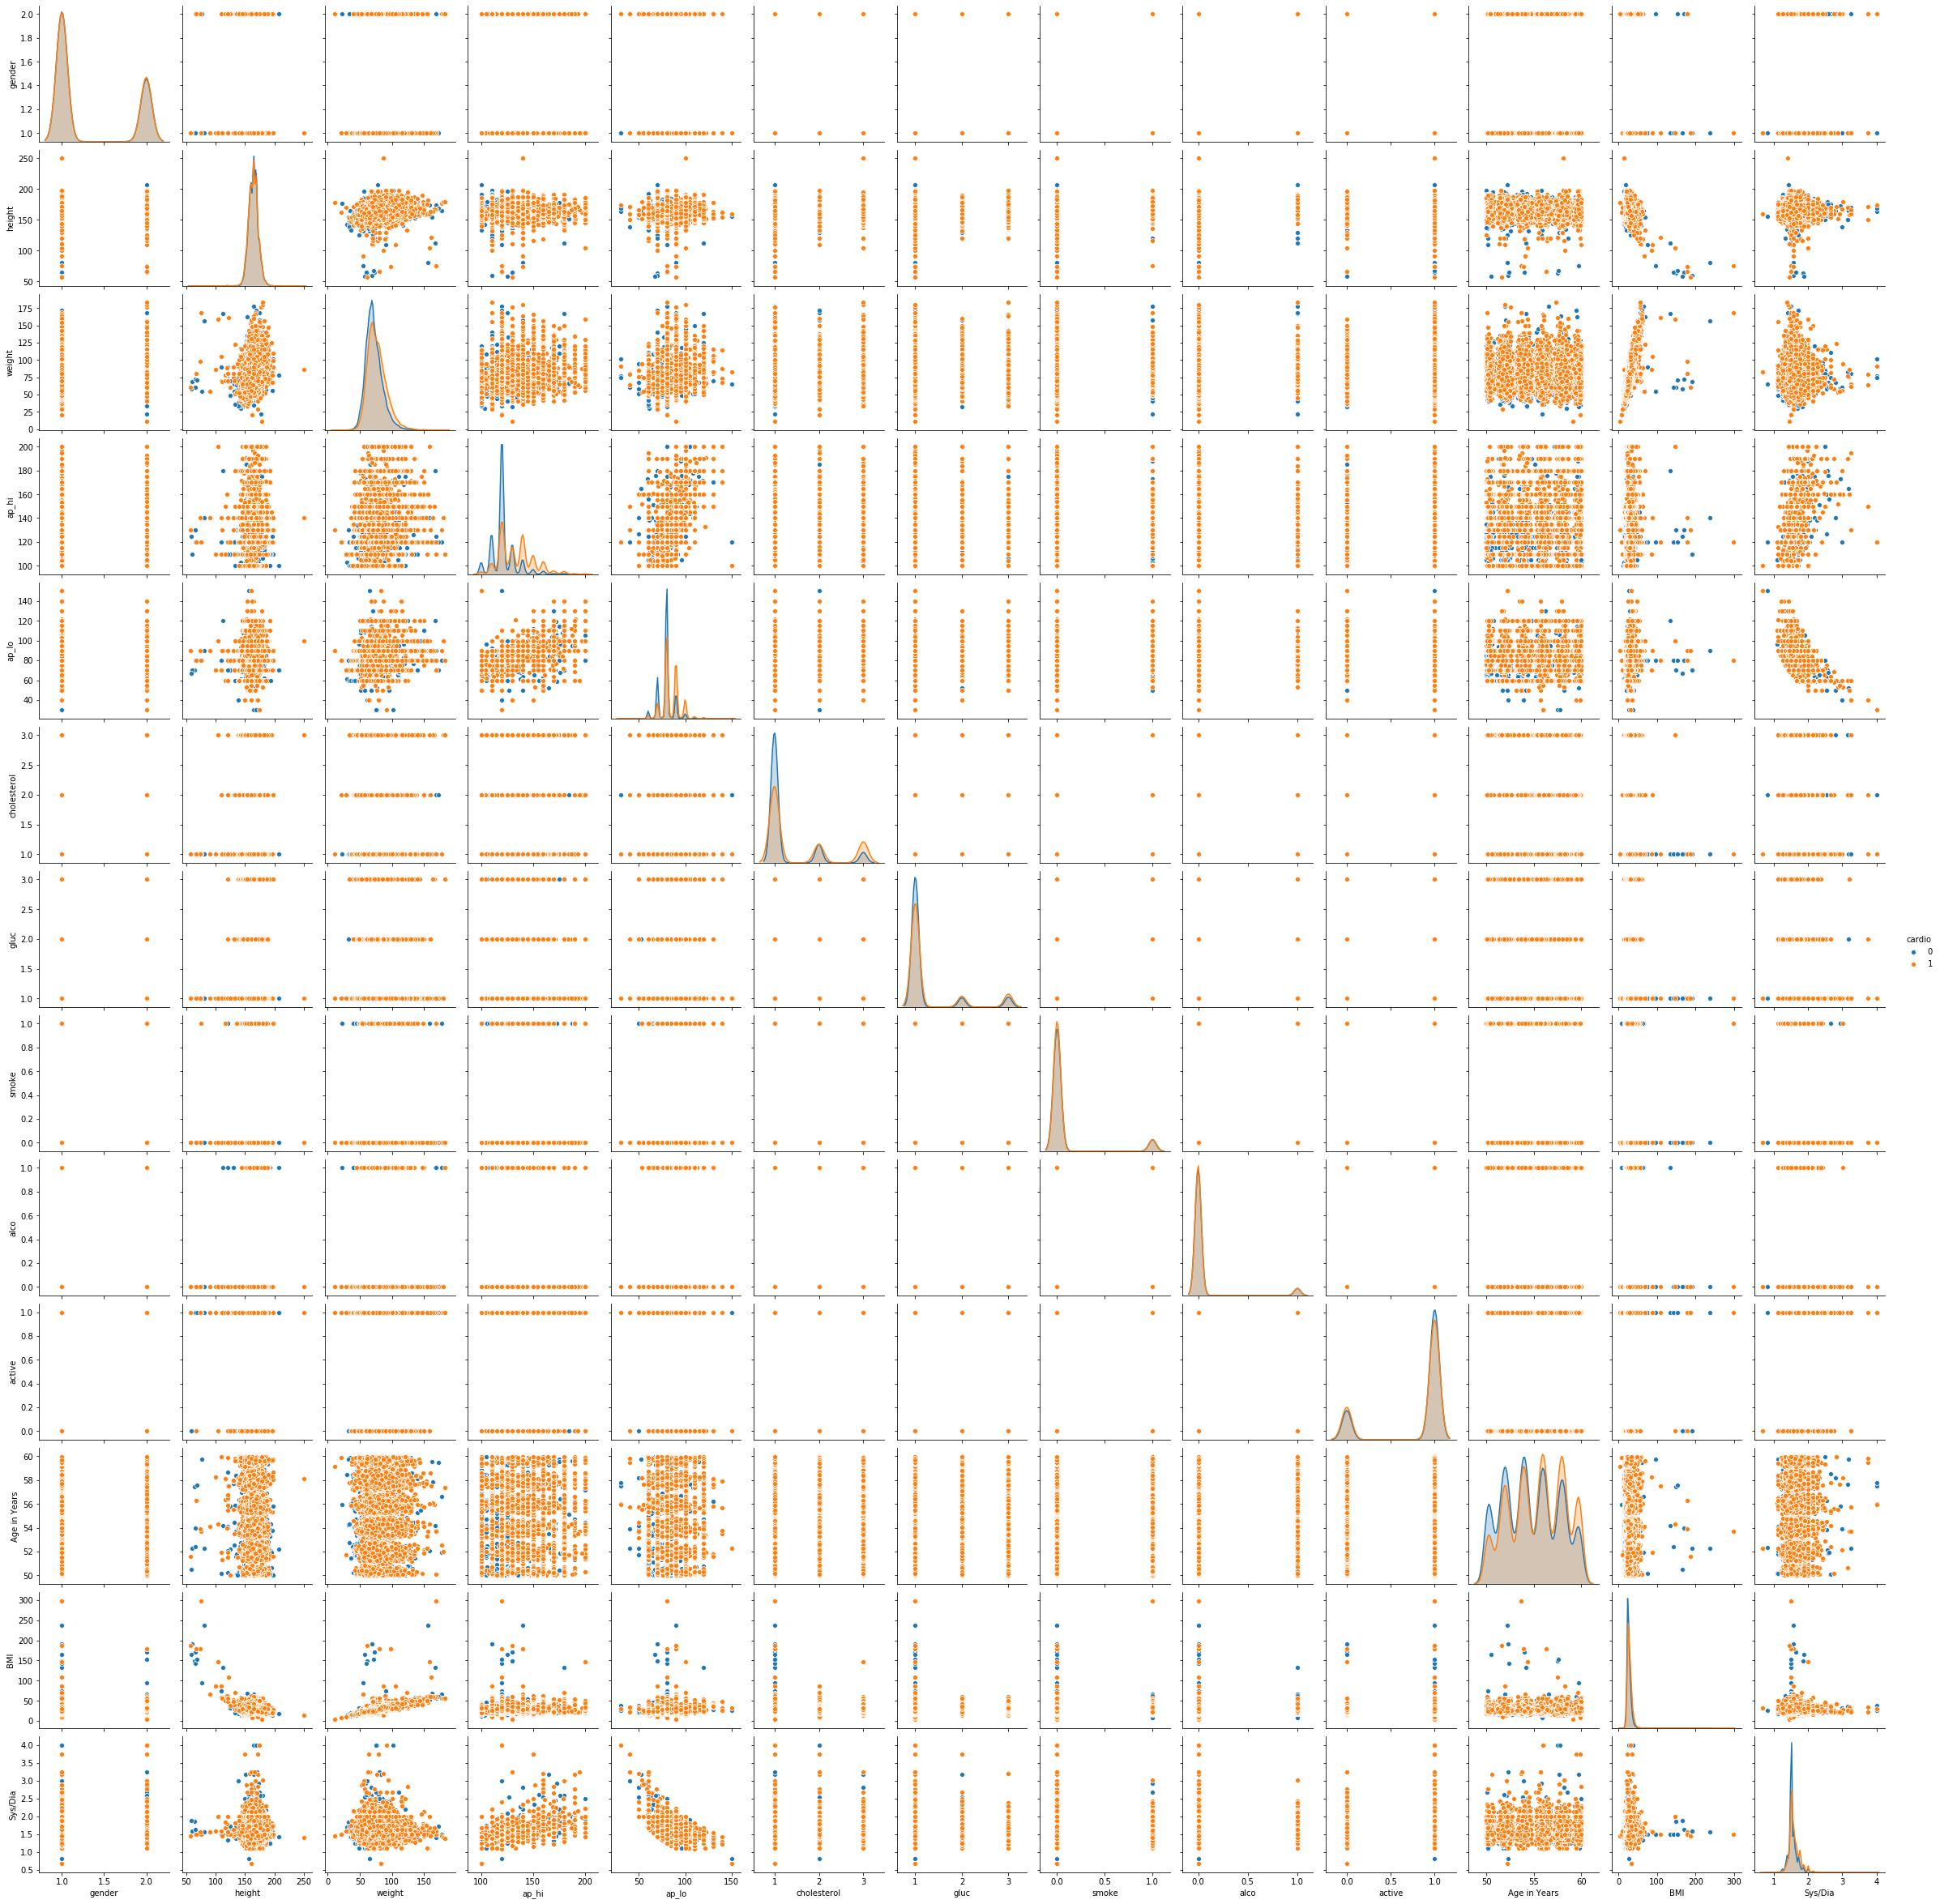

In [143]:
sns.distributions._has_statsmodels = False
sns.pairplot(data_med_age, hue='cardio')

In [144]:
X_high_age=data_high_age.drop('cardio',axis=1)
y_high=data_high_age.cardio
X_high_age=X_high_age.drop('age_category',axis=1)

In [145]:
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high_age, y_high, test_size = 0.2, random_state=42)
X_train_high

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
31460       1     169    84.0    120     80            1     1      0     0   
14488       1     170    99.0    160    100            3     1      0     0   
62650       2     167    81.0    140     80            3     3      0     0   
39327       1     159    70.0    140     95            1     1      0     0   
45826       1     159    93.0    130     90            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
65992       1     156    84.0    140     80            1     1      0     0   
28526       2     158    69.0    150     90            2     1      1     0   
29642       1     166    81.0    130     80            3     2      0     0   
4753        1     164    69.0    120     80            1     3      0     0   
40066       2     180    92.0    110     70            2     1      0     0   

       active  Age in Years        BMI   Sys/Dia  
31460       1     60.243836  29.410735  1.500000  
14488       1     63.956164  34.256055  1.600000  
62650       0     62.131507  29.043709  1.750000  
39327       1     63.304110  27.688778  1.473684  
45826       1     60.019178  36.786520  1.444444  
...       ...           ...        ...       ...  
65992       0     64.304110  34.516765  1.750000  
28526       1     62.002740  27.639801  1.666667  
29642       1     64.136986  29.394687  1.625000  
4753        1     61.904110  25.654372  1.500000  
40066       0     60.284932  28.395062  1.571429  

[10160 rows x 13 columns]

/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Logistic Regression:  0.7003937007874016
Precision Score:      0.719626168224299
Recall Score:         0.9053497942386831
F1 Score:             0.8018745118458734


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Cross Validation Scores:  [0.68011811 0.69045276 0.71850394 0.68011811 0.70029528]


Feature  Co-efficient
5    cholesterol      0.464560
10  Age in Years      0.074898
2         weight      0.065419
3          ap_hi      0.039444
4          ap_lo      0.004047
12       Sys/Dia     -0.019284
8           alco     -0.039475
1         height     -0.060612
7          smoke     -0.077373
11           BMI     -0.155693
6           gluc     -0.170918
0         gender     -0.175580
9         active     -0.198909

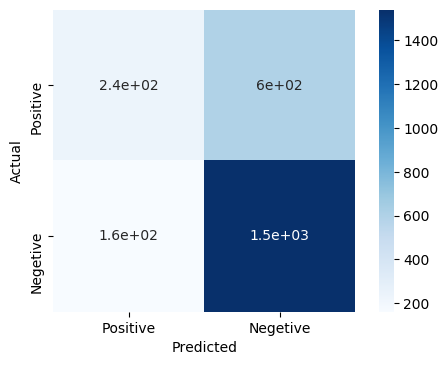

In [194]:
lm_high_age=LogisticRegression()
log_reg_results(lm_high_age,X_train_high,y_train_high,X_test_high,y_test_high)

# AUC ROC Curve

In [195]:
from sklearn.metrics import roc_auc_score, roc_curve

lm_fpr_low_age, lm_tpr_low_age, thresholds = roc_curve(y_test_low, lm_low_age.predict_proba(X_test_low)[:,1])
lm_fpr_med_age, lm_tpr_med_age, thresholds = roc_curve(y_test_med, lm_med_age.predict_proba(X_test_med)[:,1])
lm_fpr_high_age, lm_tpr_high_age, thresholds = roc_curve(y_test_high, lm_high_age.predict_proba(X_test_high)[:,1])

ROC AUC score (lm_low_age)=  0.8062848206556417
ROC AUC score (lm_med_age)=  0.749627531938083
ROC AUC score (lm_high_age)=  0.7060916981457307


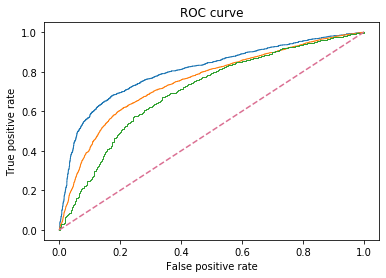

In [206]:
plt.plot(lm_fpr_low_age, lm_tpr_low_age,lw=1)
plt.plot(lm_fpr_med_age, lm_tpr_med_age,lw=1)
plt.plot(lm_fpr_high_age, lm_tpr_high_age,lw=1)
plt.plot([0,1],[0,1],c='palevioletred',ls='--')


plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score (lm_low_age)= ", roc_auc_score(y_test_low, lm_low_age.predict_proba(X_test_low)[:,1]))
print("ROC AUC score (lm_med_age)= ", roc_auc_score(y_test_med, lm_med_age.predict_proba(X_test_med)[:,1]))
print("ROC AUC score (lm_high_age)= ", roc_auc_score(y_test_high, lm_high_age.predict_proba(X_test_high)[:,1]))

# Analysis by Glucose

In [148]:
data_glu=data.copy(deep=True)
data_glu

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69995       2     168    76.0    120     80            1     1      1     0   
69996       1     158   126.0    140     90            2     2      0     0   
69997       2     183   105.0    180     90            3     1      0     1   
69998       1     163    72.0    135     80            1     2      0     0   
69999       1     170    72.0    120     80            2     1      0     0   

       active  cardio  Age in Years        BMI   Sys/Dia  
0           1       0     50.391781  21.967120  1.375000  
1           1       1     55.419178  34.927679  1.555556  
2           0       1     51.663014  23.507805  1.857143  
3           1       1     48.282192  28.710479  1.500000  
4           0       0     47.873973  23.011177  1.666667  
...       ...     ...           ...        ...       ...  
69995       1       0     52.712329  26.927438  1.500000  
69996       1       1     61.920548  50.472681  1.555556  
69997       0       1     52.235616  31.353579  2.000000  
69998       0       1     61.454795  27.099251  1.687500  
69999       1       0     56.273973  24.913495  1.500000  

[67560 rows x 14 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a91460250>]],
      dtype=object)

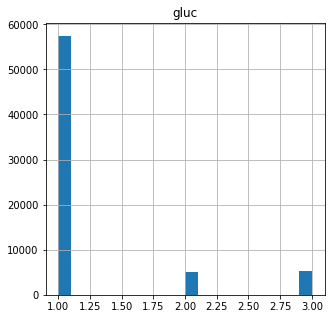

In [166]:
data_glu.hist(column=['gluc'], figsize=(5,5), bins=20)

In [155]:
data_glu_normal=data_glu[data_glu.gluc==1]
data_glu_normal

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0           2     168    62.0    110     80            1     1      0     0   
1           1     156    85.0    140     90            3     1      0     0   
2           1     165    64.0    130     70            3     1      0     0   
3           2     169    82.0    150    100            1     1      0     0   
4           1     156    56.0    100     60            1     1      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69993       1     172    70.0    130     90            1     1      0     0   
69994       1     165    80.0    150     80            1     1      0     0   
69995       2     168    76.0    120     80            1     1      1     0   
69997       2     183   105.0    180     90            3     1      0     1   
69999       1     170    72.0    120     80            2     1      0     0   

       active  cardio  Age in Years        BMI   Sys/Dia  
0           1       0     50.391781  21.967120  1.375000  
1           1       1     55.419178  34.927679  1.555556  
2           0       1     51.663014  23.507805  1.857143  
3           1       1     48.282192  28.710479  1.500000  
4           0       0     47.873973  23.011177  1.666667  
...       ...     ...           ...        ...       ...  
69993       1       1     53.969863  23.661439  1.444444  
69994       1       1     57.736986  29.384757  1.875000  
69995       1       0     52.712329  26.927438  1.500000  
69997       0       1     52.235616  31.353579  2.000000  
69999       1       0     56.273973  24.913495  1.500000  

[57422 rows x 14 columns]

In [156]:
data_glu_med=data_glu[data_glu.gluc==2]
data_glu_med

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
5           1     151    67.0    120     80            2     2      0     0   
22          1     158    90.0    145     85            2     2      0     0   
68          1     152    76.0    160    100            1     2      0     0   
74          2     180    90.0    140     90            2     2      0     0   
86          1     156    75.0    150     90            2     2      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69981       2     182   110.0    130     90            2     2      0     0   
69982       1     153    86.0    130     90            1     2      0     0   
69991       1     159    72.0    130     90            2     2      0     0   
69996       1     158   126.0    140     90            2     2      0     0   
69998       1     163    72.0    135     80            1     2      0     0   

       active  cardio  Age in Years        BMI   Sys/Dia  
5           0       0     60.038356  29.384676  1.500000  
22          1       1     63.139726  36.051915  1.705882  
68          1       1     54.079452  32.894737  1.600000  
74          0       0     43.942466  27.777778  1.555556  
86          1       1     60.024658  30.818540  1.666667  
...       ...     ...           ...        ...       ...  
69981       1       1     47.945205  33.208550  1.444444  
69982       1       1     51.893151  36.738007  1.444444  
69991       1       0     56.463014  28.479886  1.444444  
69996       1       1     61.920548  50.472681  1.555556  
69998       0       1     61.454795  27.099251  1.687500  

[4965 rows x 14 columns]

In [157]:
data_glu_high=data_glu[data_glu.gluc==3]
data_glu_high

gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
7           2     178    95.0    130     90            3     3      0     0   
17          1     158    52.0    110     70            1     3      0     0   
29          2     169    74.0    130     70            1     3      0     0   
53          1     165    77.0    135     90            3     3      0     0   
87          2     166    94.0    140     90            2     3      0     0   
...       ...     ...     ...    ...    ...          ...   ...    ...   ...   
69920       1     166    93.0    150     90            3     3      0     0   
69929       1     164    85.0    165    110            3     3      0     0   
69931       2     166    64.0    120     80            1     3      0     0   
69938       1     149    61.0    130     90            2     3      0     0   
69956       1     158    75.0    120     80            3     3      0     0   

       active  cardio  Age in Years        BMI   Sys/Dia  
7           1       1     61.873973  29.983588  1.444444  
17          1       0     45.882192  20.829995  1.571429  
29          0       0     57.690411  25.909457  1.857143  
53          1       1     39.745205  28.282828  1.500000  
87          1       1     53.871233  34.112353  1.555556  
...       ...     ...           ...        ...       ...  
69920       1       1     53.452055  33.749456  1.666667  
69929       1       1     54.339726  31.603212  1.500000  
69931       1       1     61.942466  23.225432  1.500000  
69938       1       0     61.939726  27.476240  1.444444  
69956       1       0     58.775342  30.043262  1.500000  

[5173 rows x 14 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a905d8590>,
      dtype=object)

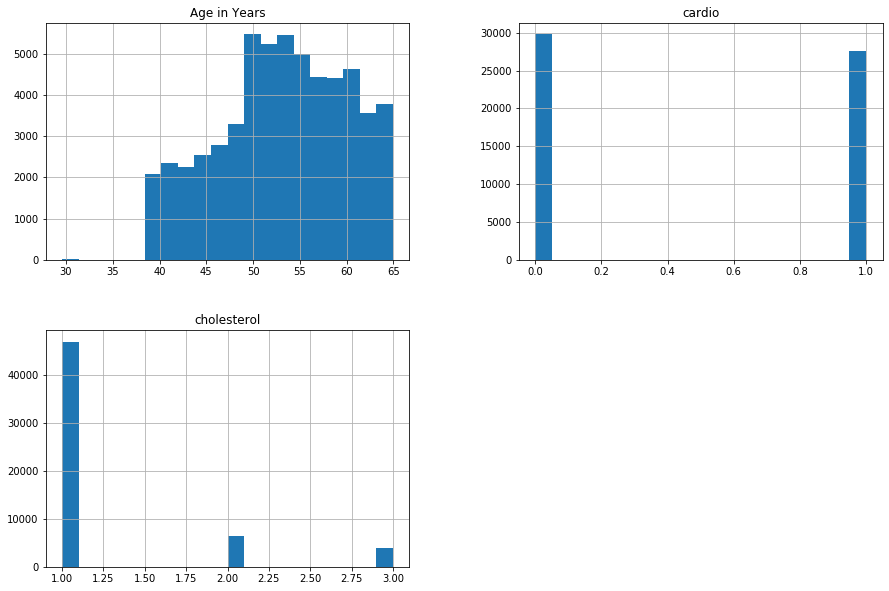

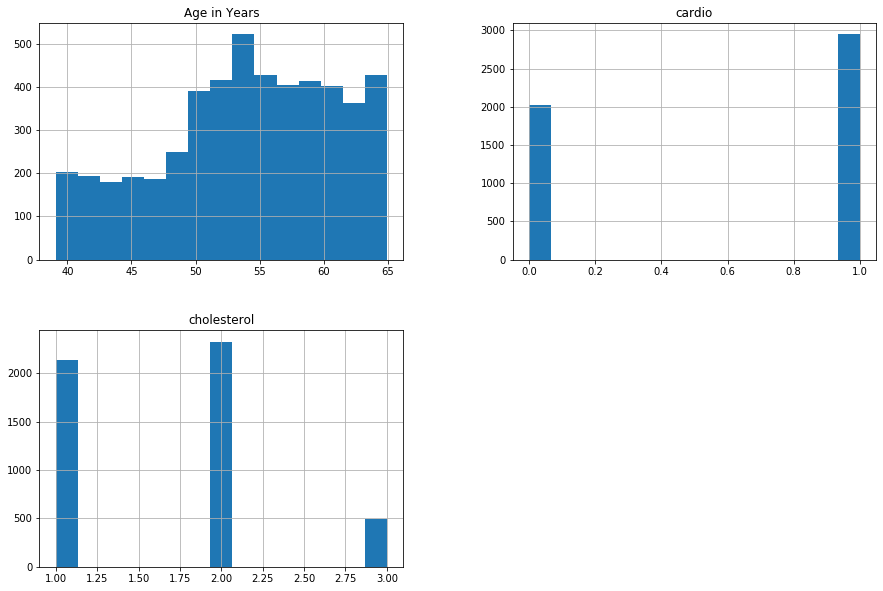

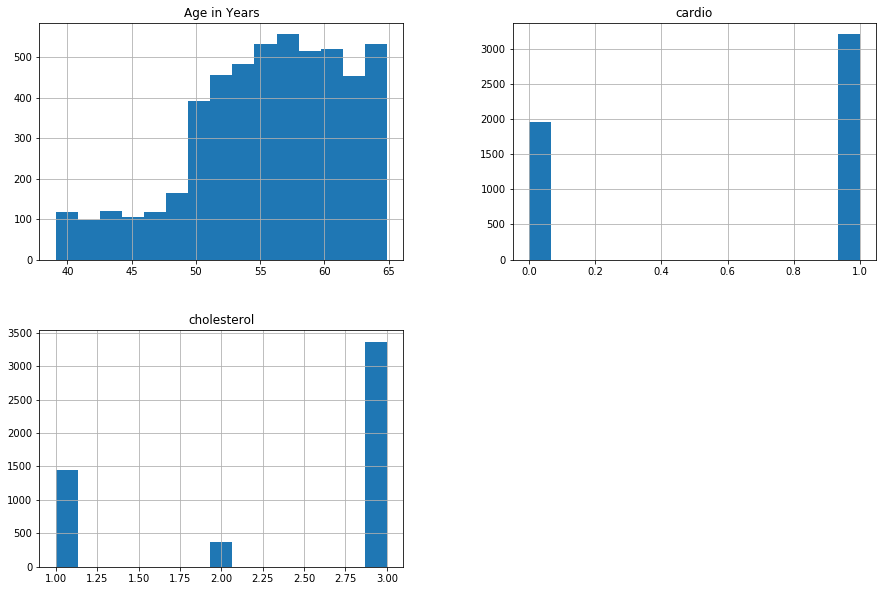

In [165]:
data_glu_normal.hist(column=['Age in Years','cholesterol','cardio'], figsize=(15,10), bins=20)
data_glu_med.hist(column=['Age in Years','cholesterol','cardio'], figsize=(15,10), bins=15)
data_glu_high.hist(column=['Age in Years','cholesterol','cardio'], figsize=(15,10), bins=15)

In [167]:
X_nor_glu=data_glu_normal.drop(['cardio','gluc'],axis=1)
y_nor_glu=data_glu_normal.cardio


In [168]:
X_train_norglu, X_test_norglu, y_train_norglu, y_test_norglu = train_test_split(X_nor_glu, y_nor_glu, test_size = 0.2, random_state=42)
X_train_norglu

gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  alco  active  \
66541       1     162    62.0    160     80            1      0     0       0   
22092       1     161    58.0    110     70            1      0     0       0   
33809       1     157    65.0    110     70            1      0     0       1   
45986       1     150    70.0    120     80            2      0     0       1   
34512       1     180   100.0    180    105            1      0     0       0   
...       ...     ...     ...    ...    ...          ...    ...   ...     ...   
66287       1     165    68.0    120     70            1      0     0       0   
46430       2     186    79.0    130     90            1      0     0       1   
1059        2     165    68.0    160    100            1      0     0       1   
19199       1     170    75.5    120     70            2      0     1       0   
68781       2     181    95.0    120     80            1      0     0       1   

       Age in Years        BMI   Sys/Dia  
66541     56.131507  23.624447  2.000000  
22092     50.827397  22.375680  1.571429  
33809     41.895890  26.370238  1.571429  
45986     59.654795  31.111111  1.500000  
34512     64.139726  30.864198  1.714286  
...             ...        ...       ...  
66287     62.008219  24.977043  1.714286  
46430     48.052055  22.835010  1.444444  
1059      57.465753  24.977043  1.600000  
19199     56.060274  26.124567  1.714286  
68781     55.800000  28.997894  1.500000  

[45937 rows x 12 columns]

/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression:  0.726948193295603
Precision Score:      0.760822974710673
Recall Score:         0.6373429084380611
F1 Score:             0.6936303243454475


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Cross Validation Scores:  [0.73215063 0.73323901 0.72156308 0.73223033 0.7279852 ]


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature  Co-efficient
5    cholesterol      0.534273
0         gender      0.106278
2         weight      0.078422
3          ap_hi      0.061348
9   Age in Years      0.050272
4          ap_lo      0.007133
1         height     -0.075376
11       Sys/Dia     -0.101003
10           BMI     -0.174442
6          smoke     -0.235022
8         active     -0.248057
7           alco     -0.248675

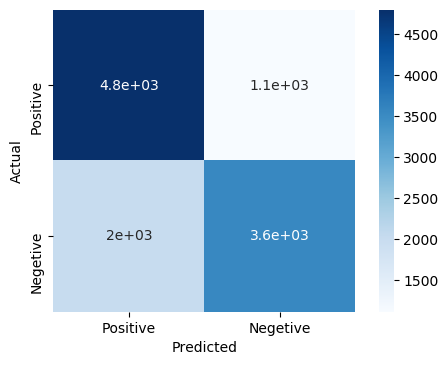

In [169]:
lm=LogisticRegression()
lm.fit(X_train_norglu,y_train_norglu)
print('Logistic Regression: ', lm.score(X_test_norglu,y_test_norglu))
predictions_lm=lm.predict(X_test_norglu)
print('Precision Score:     ', precision_score(y_test_norglu, predictions_lm))
print('Recall Score:        ', recall_score(y_test_norglu, predictions_lm))
print('F1 Score:            ', f1_score(y_test_norglu, predictions_lm))

print('Cross Validation Scores: ',cross_val_score(lm, X_train_norglu,y_train_norglu, cv=5))
 
cm_lm=confusion_matrix(y_test_norglu, predictions_lm)
plt.figure(dpi=100)
sns.heatmap(cm_lm, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Positive','Negetive'],
           yticklabels=['Positive','Negetive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

coef_table(lm,X_train_norglu,y_train_norglu)

In [170]:
X_med_glu=data_glu_med.drop(['cardio','gluc'],axis=1)
y_med_glu=data_glu_med.cardio

In [171]:
X_train_medglu, X_test_medglu, y_train_medglu, y_test_medglu = train_test_split(X_med_glu, y_med_glu, test_size = 0.2, random_state=42)
X_train_medglu

gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  alco  active  \
34521       1     161    69.0    140     90            1      0     0       0   
31874       1     165    74.0    140     90            1      0     0       1   
64229       1     152    93.0    130    100            2      0     0       0   
1045        2     160    60.0    120     80            1      0     0       1   
11149       2     174    54.0    120     80            2      0     0       1   
...       ...     ...     ...    ...    ...          ...    ...   ...     ...   
62449       1     168   136.0    140     90            1      0     0       1   
6373        1     160    60.0    110     70            1      0     0       1   
44131       1     169    61.0    170     90            2      0     0       0   
53326       2     173    94.0    150     90            2      0     1       1   
11993       2     186    88.0    120     90            2      0     0       1   

       Age in Years        BMI   Sys/Dia  
34521     64.035616  26.619343  1.555556  
31874     52.194521  27.180900  1.555556  
64229     57.608219  40.252770  1.300000  
1045      54.147945  23.437500  1.500000  
11149     58.002740  17.835910  1.500000  
...             ...        ...       ...  
62449     52.071233  48.185941  1.555556  
6373      51.950685  23.437500  1.571429  
44131     53.997260  21.357796  1.888889  
53326     63.945205  31.407665  1.666667  
11993     44.057534  25.436467  1.333333  

[3972 rows x 12 columns]

Logistic Regression:  0.6908358509566969
Precision Score:      0.7278382581648523
Recall Score:         0.78
F1 Score:             0.7530168946098151


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Cross Validation Scores:  [0.70566038 0.7245283  0.70528967 0.7115869  0.697733  ]


Feature  Co-efficient
5    cholesterol      0.308050
2         weight      0.061360
3          ap_hi      0.043765
9   Age in Years      0.028104
0         gender      0.023398
4          ap_lo      0.015779
11       Sys/Dia     -0.015028
6          smoke     -0.022993
7           alco     -0.042334
1         height     -0.056631
10           BMI     -0.135968
8         active     -0.205897

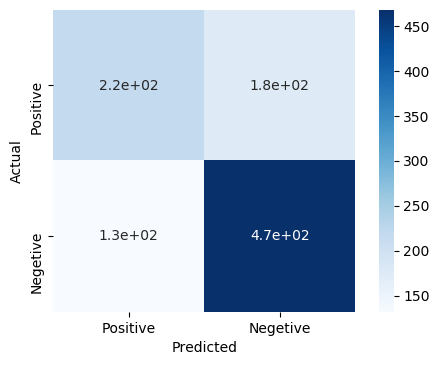

In [172]:
lm=LogisticRegression()
lm.fit(X_train_medglu,y_train_medglu)
print('Logistic Regression: ', lm.score(X_test_medglu,y_test_medglu))
predictions_lm=lm.predict(X_test_medglu)
print('Precision Score:     ', precision_score(y_test_medglu, predictions_lm))
print('Recall Score:        ', recall_score(y_test_medglu, predictions_lm))
print('F1 Score:            ', f1_score(y_test_medglu, predictions_lm))

print('Cross Validation Scores: ',cross_val_score(lm, X_train_medglu,y_train_medglu, cv=5))
 
cm_lm=confusion_matrix(y_test_medglu, predictions_lm)
plt.figure(dpi=100)
sns.heatmap(cm_lm, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Positive','Negetive'],
           yticklabels=['Positive','Negetive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

coef_table(lm,X_train_medglu,y_train_medglu)

In [173]:
X_high_glu=data_glu_high.drop(['cardio','gluc'],axis=1)
y_high_glu=data_glu_high.cardio

In [174]:
X_train_highglu, X_test_highglu, y_train_highglu, y_test_highglu = train_test_split(X_high_glu, y_high_glu, test_size = 0.2, random_state=42)
X_train_highglu

gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  alco  active  \
39398       1     154    91.0    120     80            1      0     0       1   
28211       2     170    68.0    120     80            3      0     0       1   
63625       1     164    72.0    120     80            1      0     0       1   
34084       2     167    80.0    140     90            3      0     0       1   
30966       1     158    54.0    100     60            3      0     0       1   
...       ...     ...     ...    ...    ...          ...    ...   ...     ...   
59809       1     170    75.0    140     90            2      0     0       1   
6406        2     181   105.0    132     92            2      1     0       1   
42210       1     156    74.0    140     90            3      0     0       1   
50974       1     173    96.0    130     90            2      0     0       1   
12085       1     163    81.0    120     70            1      0     0       1   

       Age in Years        BMI   Sys/Dia  
39398     55.512329  38.370720  1.500000  
28211     60.564384  23.529412  1.500000  
63625     55.326027  26.769780  1.500000  
34084     63.389041  28.685145  1.555556  
30966     52.115068  21.631149  1.666667  
...             ...        ...       ...  
59809     44.597260  25.951557  1.555556  
6406      42.561644  32.050304  1.434783  
42210     58.317808  30.407627  1.555556  
50974     48.117808  32.075913  1.444444  
12085     57.884932  30.486657  1.714286  

[4138 rows x 12 columns]

/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

Logistic Regression:  0.6908212560386473
Precision Score:      0.7186700767263428
Recall Score:         0.8489425981873112
F1 Score:             0.7783933518005541
Cross Validation Scores:  [0.67753623 0.6884058  0.67874396 0.69528416 0.68198307]


/Users/pratik-test/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature  Co-efficient
5    cholesterol      0.362508
9   Age in Years      0.034583
3          ap_hi      0.033281
2         weight      0.023054
0         gender      0.007344
4          ap_lo      0.003379
7           alco     -0.022973
10           BMI     -0.036626
11       Sys/Dia     -0.042963
1         height     -0.044683
6          smoke     -0.062383
8         active     -0.205712

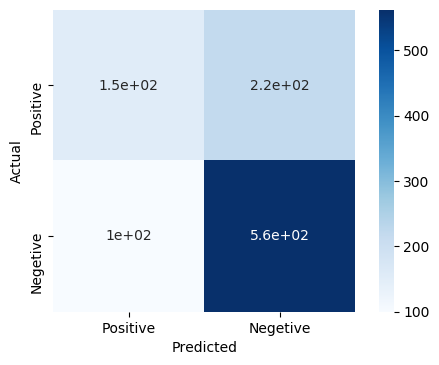

In [175]:
lm=LogisticRegression()
lm.fit(X_train_highglu,y_train_highglu)
print('Logistic Regression: ', lm.score(X_test_highglu,y_test_highglu))
predictions_lm=lm.predict(X_test_highglu)
print('Precision Score:     ', precision_score(y_test_highglu, predictions_lm))
print('Recall Score:        ', recall_score(y_test_highglu, predictions_lm))
print('F1 Score:            ', f1_score(y_test_highglu, predictions_lm))

print('Cross Validation Scores: ',cross_val_score(lm, X_train_highglu,y_train_highglu, cv=5))
 
cm_lm=confusion_matrix(y_test_highglu, predictions_lm)
plt.figure(dpi=100)
sns.heatmap(cm_lm, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=['Positive','Negetive'],
           yticklabels=['Positive','Negetive'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

coef_table(lm,X_train_highglu,y_train_highglu)